# Mini Project Two - Wild Blueberry Yield Prediction <span style="font-size: 22px;">(Pollination Simulation Data)</span>

### By Nick Hay

# 1. Business context behind the dataset

- What is the main business question that needs to be answered? 

> The main business question that needs to be answered: “How can we accurately predict the yield of wild blueberries based on various factors such as Bee Density, air temperature, rain days, and fruit properties (fruitset, fruitmass, seed count)”

- The data question that needs to be answered: 
    
> “What factors influence the yield of wild blueberries and how can we use these factors to predict future yields?” 

- Abstract

> Research is underway in the agricultural sector to better predict crop yield using machine learning algorithms. 
Many machine learning algorithms require large amounts of data in order to give useful results. 
One of the major challenges in training and experimenting with machine learning algorithms is the 
availability of training data in sufficient quality and quantity remains a limiting factor [1].



# 2. Data Dictionary

| Variable / Features           |                               Description                                                           | Unit           |
|-------------------------------|----------------------------------------------------------------------------------------------------:|----------------|
| Clone size (CS)               | The average blueberry clone size in the field                                                       | $m^2$          |
| Honeybee (HB)                 | Honeybee (*Apis mellifera* (L.)) density in the field                                               | bees/$m^2$/min |
| Bumblebee (BB)                | Bumblebee (*Bombus* spp.) density in the field                                                      | bees/$m^2$/min |
| Andrena (AD)                  | *Andrena* spp. bee density in the field                                                             | bees/$m^2$/min |
| Osmia (OS)                    | *Osmia* spp. bee density in the field                                                               | bees/$m^2$/min |
| MaxOfUpperTRange (MaxUTR)     | The highest record of the upper band daily air temperature during the bloom season                  | °F             |
| MinOfUpperTRange (MinUTR)     | The lowest record of the upper band daily air temperature number                                    | °F             |
| AverageOfUpperTRange (AvUTR ) | The average of the upper band daily air temperature fare                                            | °F             |
| MaxOfLowerTRange (MaxLTR)     | The highest record of the lower band daily air temperature                                          | °F             |
| MinOfLowerTRange (MinLTR)     | The lowest record of the lower band daily air temperature                                           | °F             |
| AverageOfLowerTRange (AvLTR)  | The average of the lower band daily air temperature                                                 | °F             |
| Raining Days (RD)             | The total number of days during the bloom season, each of which has precipitation larger than zero  | Day            |
| Average Raining Days (AvRD)   | The average of raining days of the entire bloom season                                              | Day            |
| Fruitset                      | The ratio of flowers that successfully develop into fruits                                          | Ratio or %     |
| Fruitmass                     | The average mass of a single fruit produced                                                         | Ounces?        |
| Seeds                         | The average number of seeds per fruit                                                               | Count          |
| Yield                         | The total harvestable quantity of blueberries per unit area                                         | lb/$m^2$?      |

In [ ]:
# Not 100% if the units are correct as in the Data in brief, it mentions C but temp

# 3. Load Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

# from sklearn.linear_model import LogisticRegression

%matplotlib inline

# 4. Load Dataset

In [2]:
# Read WildBlueberryPollinationSimulationData.csv
Wild_Blueberry_csv = r'C:\Users\nick_\Documents\Institue of Data (IOD) Data Science and AI Programme\Mini Project Two\WildBlueberryPollinationSimulationData.csv'
df = pd.read_csv(Wild_Blueberry_csv)

# 5. Explore Dataset - Preform Exploratory Data Analysis (EDA)

In [ ]:
# From most of the labs (modules 2 through to 7)

### 5.a Head

In [3]:
# Check Head
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


### 5.b Tail

In [4]:
# Check Tail
df.tail()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735
776,776,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,24.00,0.39,0.384646,0.392303,29.742583,3943.131681


### 5.c Sample of 5 random rows

In [5]:
# Sample 5 random rows
df.sample(5)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
701,701,25.0,0.50,0.38,0.50,0.50,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.489635,0.445497,35.602682,5645.146626
331,331,12.5,0.25,0.25,0.75,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.586603,0.488569,40.638496,7428.834423
289,289,12.5,0.25,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.511751,0.427683,35.179912,6461.670875
616,616,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.408798,0.389204,30.734538,4574.813873
548,548,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.461465,0.405558,32.603178,6058.648764


### 5.d Shape

In [6]:
# Check rows, columns
df.shape

(777, 18)

### 5.e Check Data Types

In [7]:
# Check DataTypes
df.dtypes
# all are floats except for Row number column which is an integer

Row#                      int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

### 5.f Have a look at the info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

### 5.g Check for any Null Values

In [9]:
df.isnull().sum()
# there are no null values

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

### 5.h Check for duplicates

In [10]:
# Find duplicate rows across all columns:
duplicateRows = df[df.duplicated()]
duplicateRows

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield


In [11]:
boolean = df['yield'].duplicated().any()
boolean

False

### 5.i Unique Values

In [12]:
# Classification: If you want to predict a categorical outcome (like clonesize if it’s categorical), 
# you could use classification techniques. 
# Some examples of classification algorithms include Logistic Regression, Naive Bayes, Decision Trees, Random Forest, and Support Vector Machines.
unique_values = df['clonesize'].unique()
print(unique_values)

[37.5 25.  12.5 20.  10.  40. ]


In [13]:
unique_count = df['clonesize'].nunique()
print(unique_count)

# Six unique categories so won't be able to use for classification

6


### 5.j Drop duplicates etc

In [14]:
# no duplicates
# example: df.drop_duplicates(inplace = True)

# example: f.dropna(subset=['Date'], inplace = True)

### 5.k Fill Null Values

In [15]:
# There are no nulls 
# example: titanic[titanic['Age'].isna()]

### 5.l Fill with Mean Values

In [16]:
# Fill Cabin with Mean values
# example: titanic['Cabin'].fillna(titanic.groupby(by=['Pclass'])['Cabin'].transform("mean"), inplace=True)

### 5.m Replace any missing values 

In [17]:
# THere are no missing values that need replacing

# example: df.loc[7, 'Duration'] = 45

# example df["Calories"].fillna(x, inplace = True)

### 5.n Remove Decimal Numbers

In [18]:
# Remove Decimal Numbers
# example titanic['Cabin'] = np.round(titanic['Cabin'], decimals=0)

### 5.o Are there any categorical values that should be strings?

In [19]:
# example: data['zip_code'] = data['zip_code'].astype(str)
# No not in this data set.

### 5.p Convert any datetime columns

In [20]:
# Convert sale_date to datetime datatype
# There is none in this data set

# Example
# data['sale_date'] = pd.to_datetime(data['sale_date'].str.replace('EDT', 'UTC+4'))

# data.head()

### 5.q Any further clean up required

In [21]:
# Columns names are not uniform.

#    Uppercase, Lowercase > Lowercase
#    Space > _
#    ?, * > Remove

In [22]:
# def clean_column_name(column_names):
#    clean_column_names = []
#    for c in column_names:
#        c = c.lower().replace(' ', '_')
#        c = c.lower().replace('*', '')
#        c = c.lower().replace('?', '')
#        clean_column_names.append(c)
#
#    return clean_column_names

### 5.r Describe

In [23]:
# Show Summary statistics
# from Lab 4.1.1 Answers
# Drop row# as this is a column of numbers from 0 - 776
# df.drop(df.columns[0], axis=1, inplace=True)
# set Row# as the index
df.set_index('Row#', inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clonesize,777.0,18.767696,6.999063,10.000000,12.500000,12.500000,25.000000,40.000000
honeybee,777.0,0.417133,0.978904,0.000000,0.250000,0.250000,0.500000,18.430000
bumbles,777.0,0.282389,0.066343,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,777.0,0.468817,0.161052,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,777.0,0.562062,0.169119,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,777.0,82.277091,9.193745,69.700000,77.400000,86.000000,89.000000,94.600000
MinOfUpperTRange,777.0,49.700515,5.595769,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,777.0,68.723037,7.676984,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,777.0,59.309395,6.647760,50.200000,55.800000,62.000000,66.000000,68.200000
MinOfLowerTRange,777.0,28.690219,3.209547,24.300000,27.000000,30.000000,30.000000,33.000000


In [24]:
""" Got min value 0 for honeybee, bumbles, andrena and osmia which is okay as logically these could be zero """

' Got min value 0 for honeybee, bumbles, andrena and osmia which is okay as logically these could be zero '

In [25]:
# from Lab 4.1.1 Answers
df[df['honeybee'] == 0]

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,,,,,,,,,,,,,,,,,
759,20.0,0.0,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.380852,0.396044,30.052521,3923.906282
760,20.0,0.0,0.202,0.707,0.101,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.492760,0.443520,35.311957,5718.408168
766,20.0,0.0,0.042,0.147,0.021,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.192732,0.311921,22.079199,1637.704022
767,20.0,0.0,0.585,0.000,0.000,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.599984,0.529791,46.585105,7575.801245
768,20.0,0.0,0.000,0.585,0.000,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.249335,0.320727,23.412776,2605.696759
769,20.0,0.0,0.000,0.000,0.585,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.361519,0.389815,29.559494,4254.825135
770,20.0,0.0,0.293,0.234,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.497503,0.453339,36.633376,5449.421199
771,20.0,0.0,0.058,0.409,0.117,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.335927,0.377012,28.135899,3471.192143


In [26]:
# from Lab 4.1.1 Answers
df[df['bumbles'] == 0]

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,,,,,,,,,,,,,,,,,
761,20.0,6.64,0.0,0.000,0.000,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.508675,0.336240,24.601741,4936.364770
762,20.0,18.43,0.0,0.000,0.000,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.559628,0.364937,27.106391,6131.309380
768,20.0,0.00,0.0,0.585,0.000,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.249335,0.320727,23.412776,2605.696759
769,20.0,0.00,0.0,0.000,0.585,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.361519,0.389815,29.559494,4254.825135


In [27]:
# from Lab 4.1.1 Answers
df[df['andrena'] == 0]

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,,,,,,,,,,,,,,,,,
761,20.0,6.64,0.000,0.0,0.000,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.508675,0.336240,24.601741,4936.364770
762,20.0,18.43,0.000,0.0,0.000,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.559628,0.364937,27.106391,6131.309380
767,20.0,0.00,0.585,0.0,0.000,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.599984,0.529791,46.585105,7575.801245
769,20.0,0.00,0.000,0.0,0.585,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.361519,0.389815,29.559494,4254.825135


In [28]:
# from Lab 4.1.1 Answers
df[df['osmia'] == 0]

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,,,,,,,,,,,,,,,,,
761,20.0,6.64,0.000,0.000,0.0,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.508675,0.336240,24.601741,4936.364770
762,20.0,18.43,0.000,0.000,0.0,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.559628,0.364937,27.106391,6131.309380
767,20.0,0.00,0.585,0.000,0.0,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.599984,0.529791,46.585105,7575.801245
768,20.0,0.00,0.000,0.585,0.0,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.249335,0.320727,23.412776,2605.696759


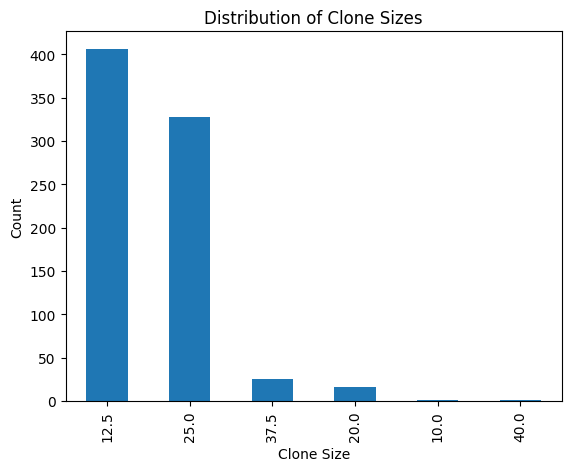

In [29]:
df['clonesize'].value_counts().plot(kind='bar')

plt.title('Distribution of Clone Sizes')  # Add a title
plt.xlabel('Clone Size')  # Add x-axis label
plt.ylabel('Count')  # Add y-axis label

plt.show()

# only use this on categorical data e.g. see Lab 4.1.2

### 5.s Correlation

In [30]:
df.corr()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.119745,0.004807,-0.008451,-0.139049,0.034157,0.032854,0.033752,0.034295,0.033768,0.033566,-0.021696,-0.024455,-0.556591,-0.474038,-0.496156,-0.516737
honeybee,0.119745,1.000000,-0.233954,-0.125913,-0.189058,0.026359,0.025467,0.026365,0.026477,0.026104,0.025647,-0.073818,-0.093477,-0.009406,-0.166419,-0.170808,-0.044250
bumbles,0.004807,-0.233954,1.000000,0.010758,0.293665,-0.022863,-0.005801,-0.015821,-0.024662,-0.016801,-0.013985,0.058063,0.075376,0.289890,0.358202,0.380206,0.309407
andrena,-0.008451,-0.125913,0.010758,1.000000,0.387379,-0.026497,-0.023887,-0.025578,-0.026775,-0.025623,-0.025115,0.035297,0.043739,0.102549,0.092470,0.089178,0.140277
osmia,-0.139049,-0.189058,0.293665,0.387379,1.000000,-0.063755,-0.043237,-0.055441,-0.065910,-0.056546,-0.053141,0.083667,0.104188,0.334178,0.336136,0.353116,0.380892
MaxOfUpperTRange,0.034157,0.026359,-0.022863,-0.026497,-0.063755,1.000000,0.990961,0.998314,0.999900,0.998842,0.997658,-0.003286,-0.005677,-0.130450,0.058492,-0.034486,-0.187075
MinOfUpperTRange,0.032854,0.025467,-0.005801,-0.023887,-0.043237,0.990961,1.000000,0.997056,0.988988,0.996267,0.997798,-0.000798,-0.001889,-0.119856,0.067671,-0.024240,-0.175883
AverageOfUpperTRange,0.033752,0.026365,-0.015821,-0.025578,-0.055441,0.998314,0.997056,1.000000,0.997413,0.999944,0.999923,-0.002325,-0.004195,-0.125082,0.064034,-0.028925,-0.181774
MaxOfLowerTRange,0.034295,0.026477,-0.024662,-0.026775,-0.065910,0.999900,0.988988,0.997413,1.000000,0.998071,0.996609,-0.003558,-0.006087,-0.130693,0.058487,-0.034674,-0.187439
MinOfLowerTRange,0.033768,0.026104,-0.016801,-0.025623,-0.056546,0.998842,0.996267,0.999944,0.998071,1.000000,0.999787,-0.002403,-0.004334,-0.126788,0.062093,-0.030727,-0.183339


# 6. Visualise the data

- Scatterplots illustrate the relationships between variables 
- Pearson correlation coefficients stronger than 0.7 and -0.7 suggest relationships

In [31]:
# df.corr()['yield'].sort_values()

### 6.a masked heatmap

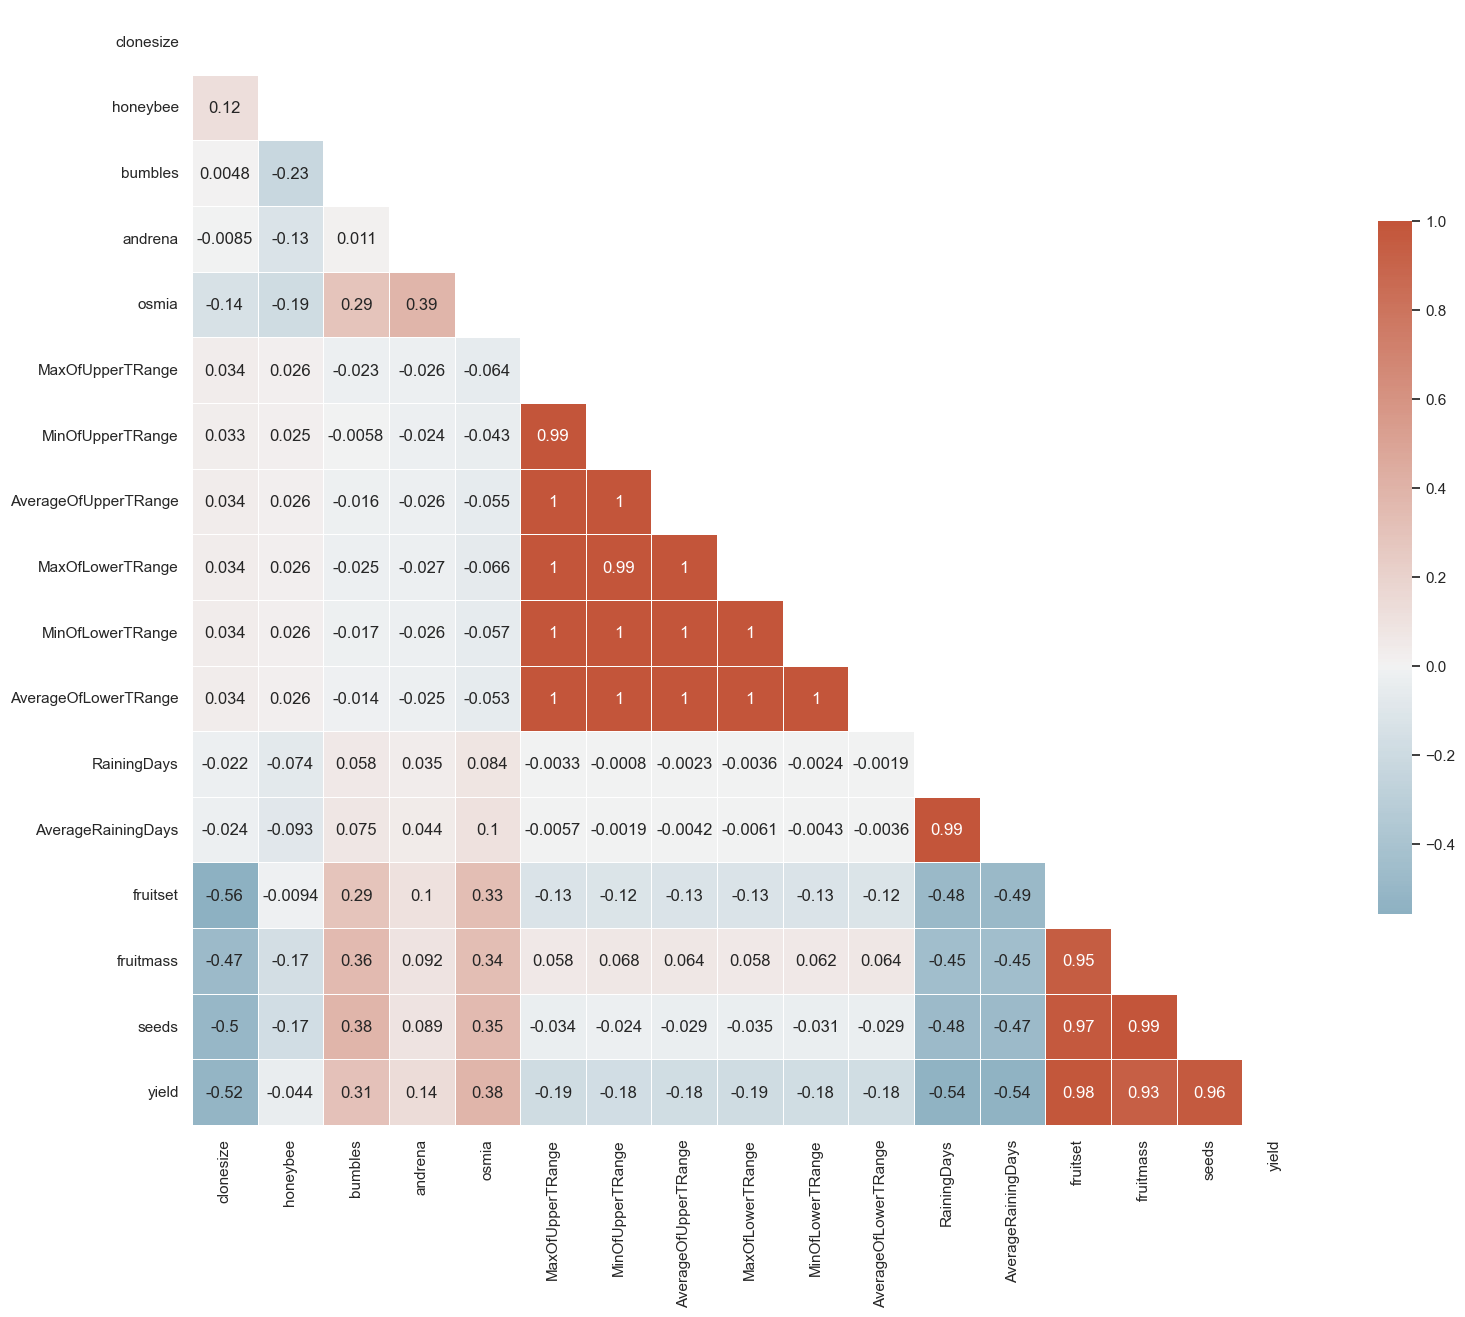

In [32]:
# masked heatmap

corr_matrix = df.corr()

# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

### 6.b Pearson Correlation of Features

- Pearson correlation coefficients stronger than 0.7 and -0.7 suggest relationships

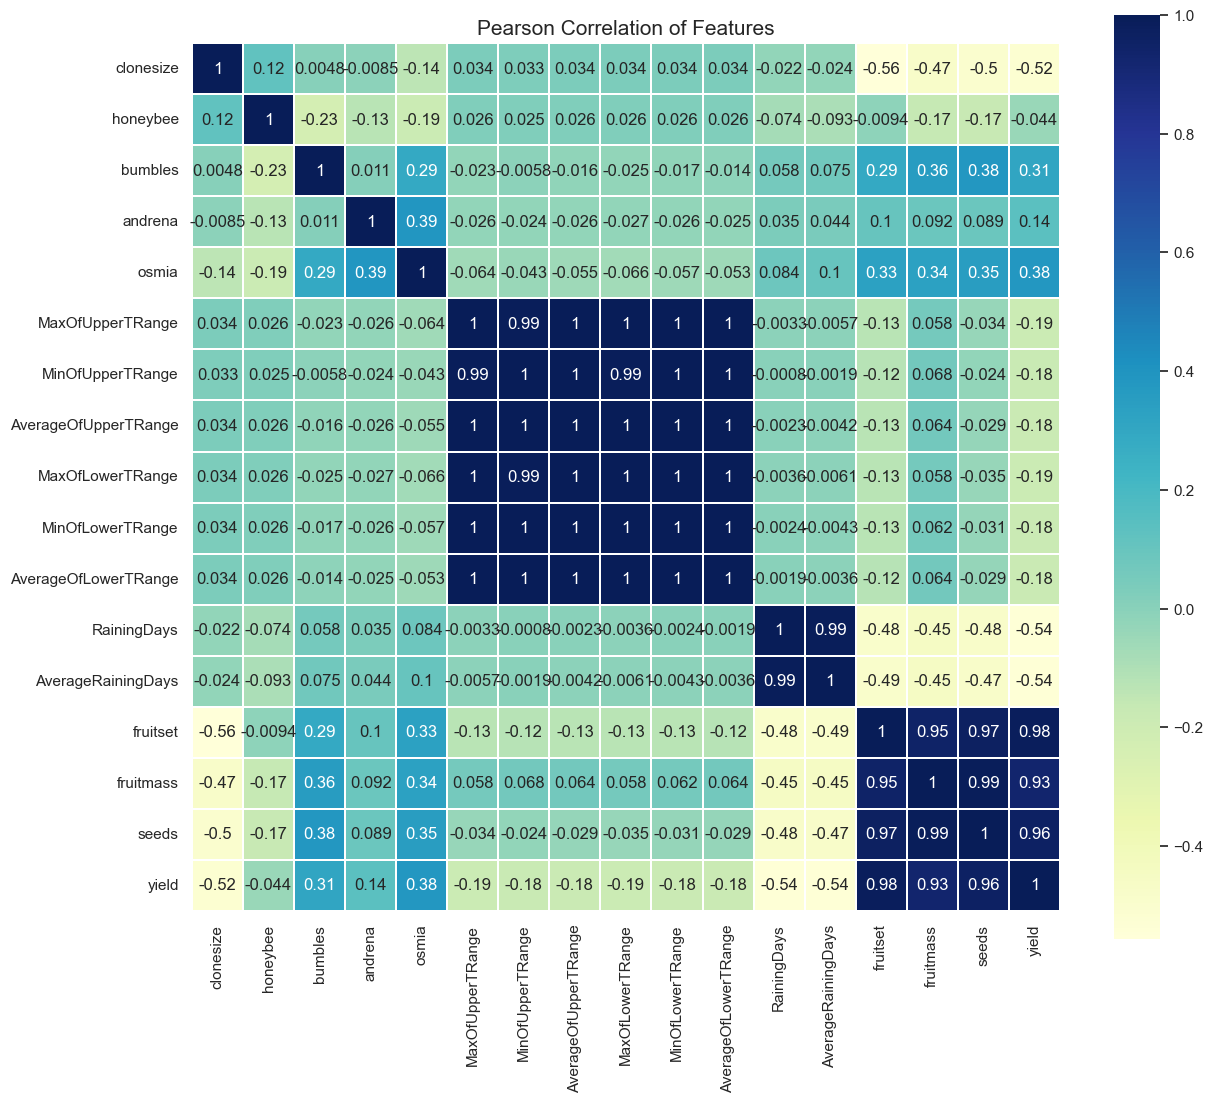

In [33]:
colormap = plt.cm.YlGnBu

plt.figure(figsize = (14, 12))
plt.title('Pearson Correlation of Features', size = 15)
sns.heatmap(df.astype(float).corr(),
            linewidths = 0.1,
            vmax = 1.0,
            square = True,
            cmap = colormap,
            linecolor = 'white',
            annot = True)
plt.show();

# Save the plot as an image file (from chat GPT)
# plt.savefig('Blueberries_Correlation.png')

### 6.c Pairwise correlation

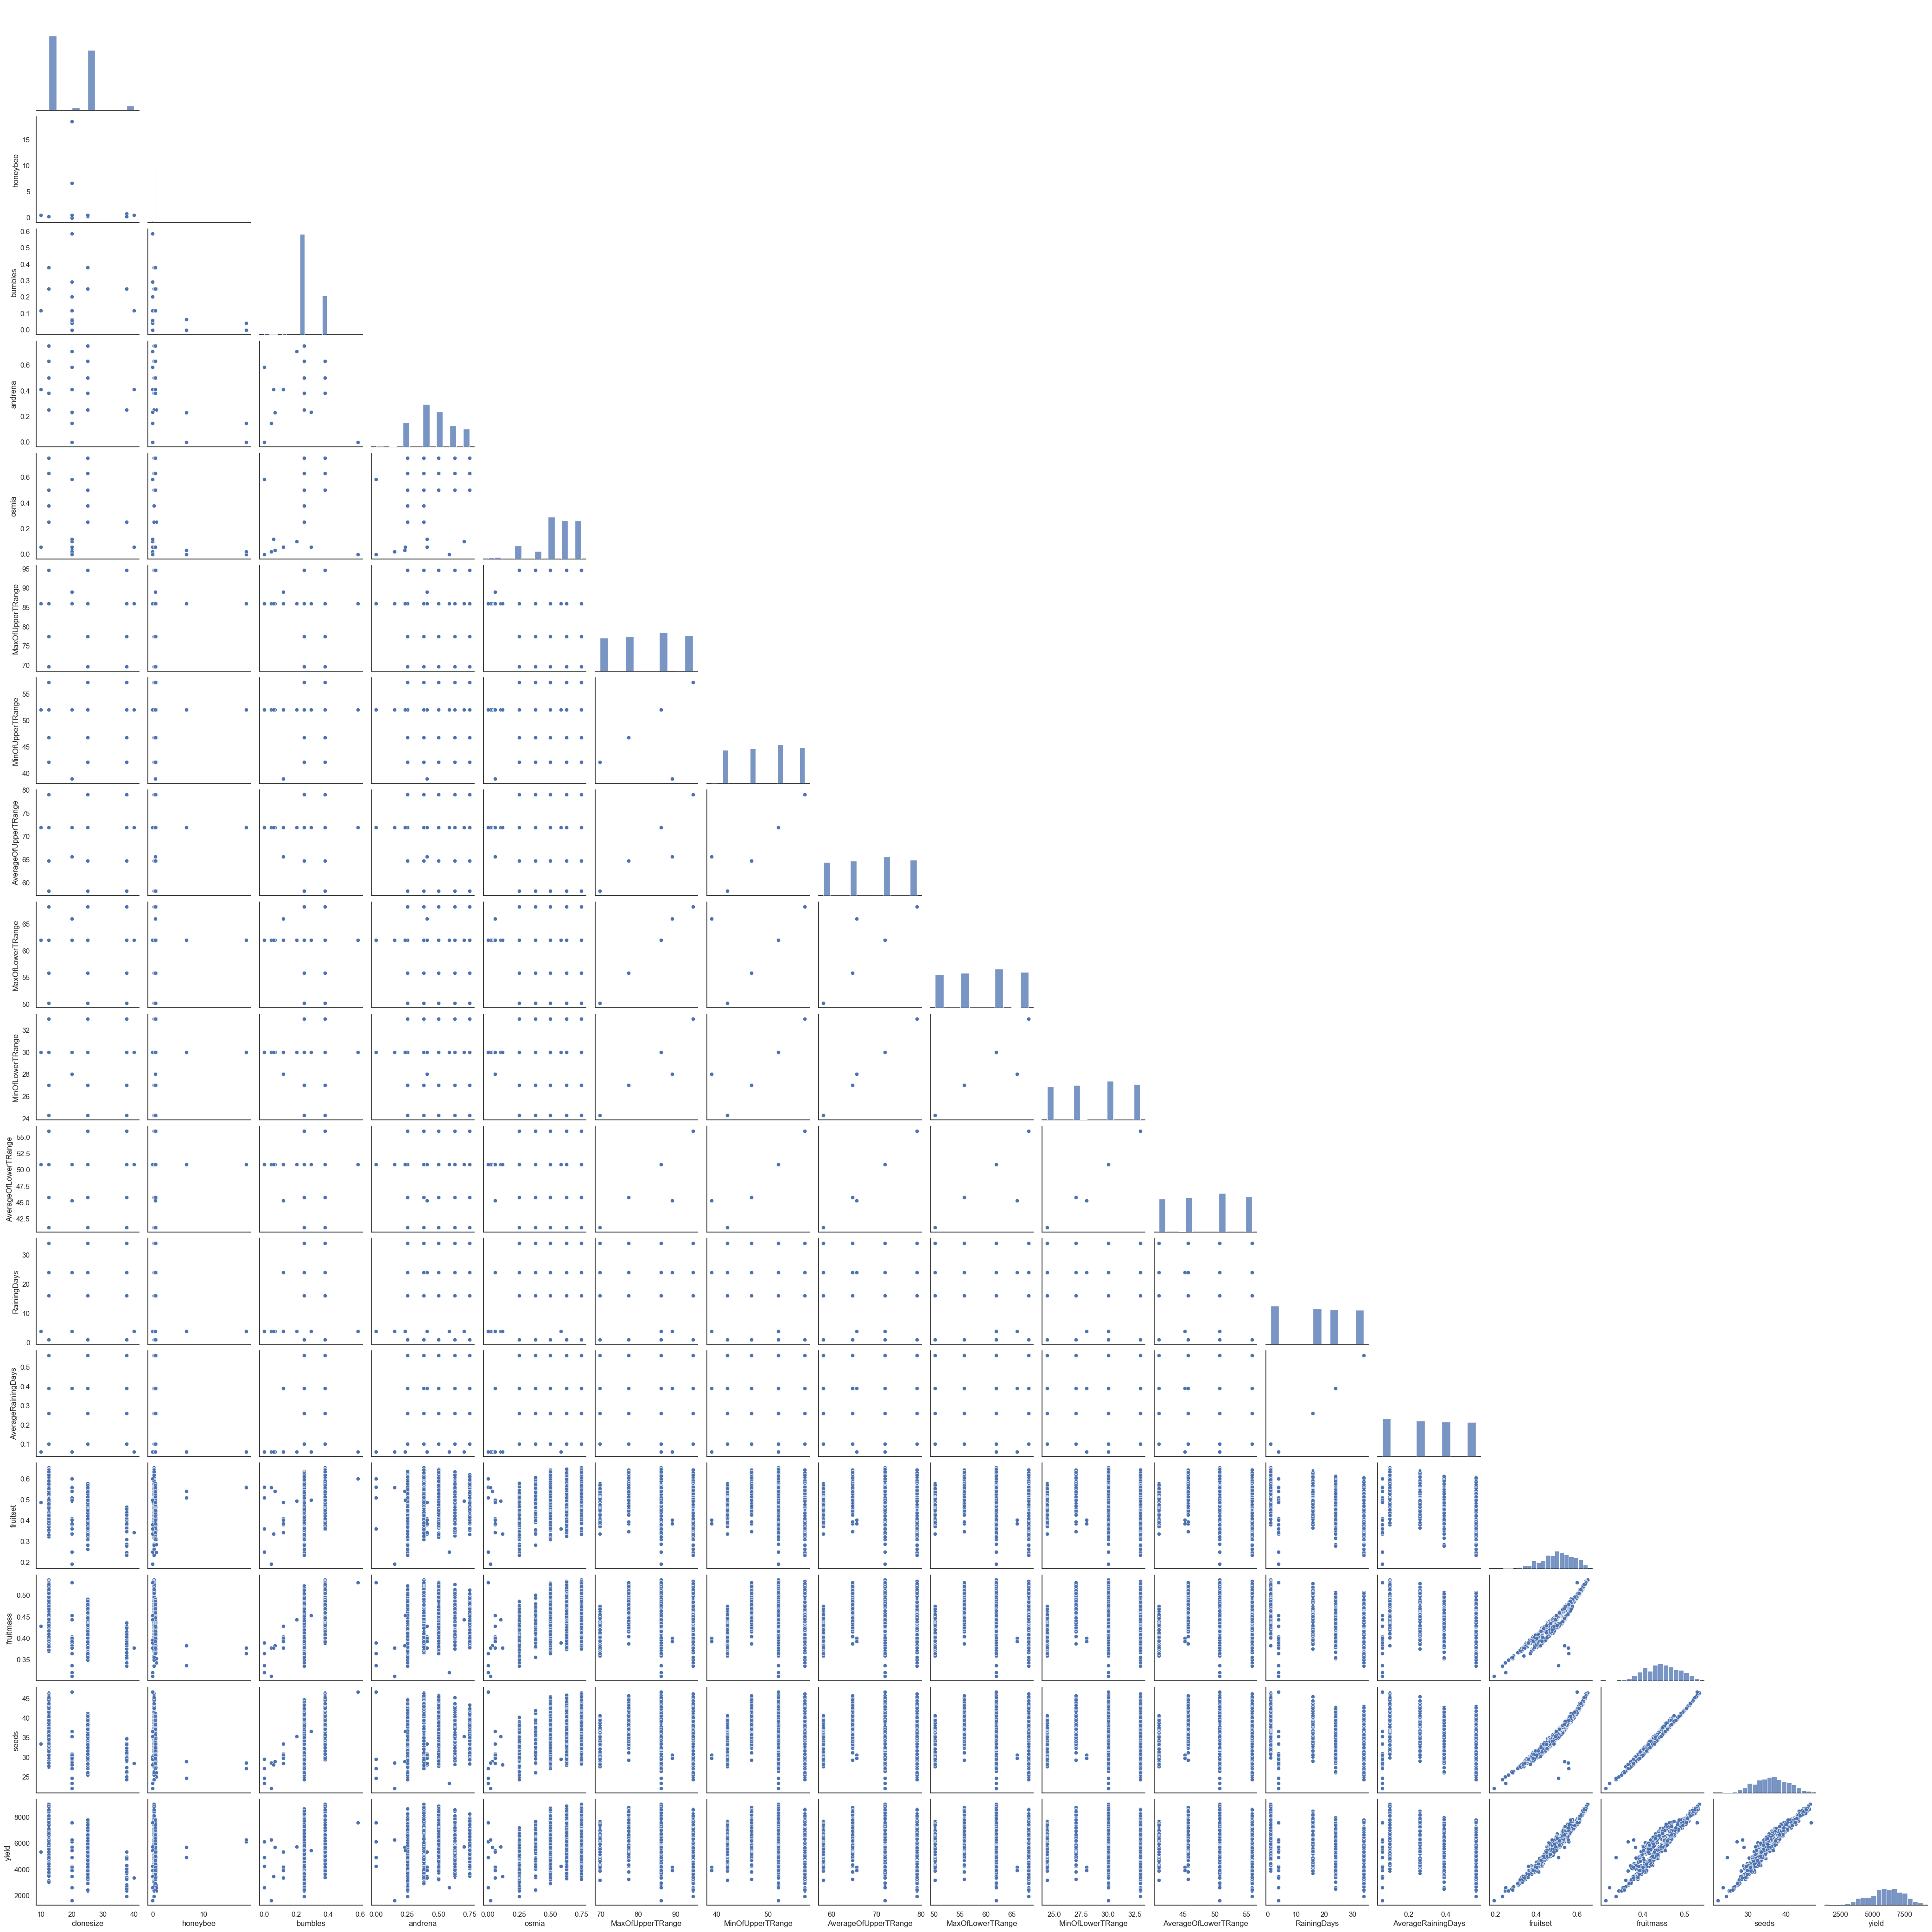

In [36]:
# Ignore seaborn's UserWarning about tight_layout
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')

sns.pairplot(df, corner=True)
plt.show()

In [ ]:
# delete?
# sns.pairplot(df, hue='yield', corner=True)
# plt.show();

In [ ]:
# delete?
# sns.pairplot(df, kind='reg', diag_kind='kde')
# plt.show();

### 6.d Scatter Plot

Scatterplots illustrate the relationships between variables

In [37]:
# Define a scatter plot function:
# from Microsoft Copilot 

## Mean of Yield
Y_hat = df['yield'].mean()

def draw_scatter_plot(X, Y, title, xlabel, ylabel):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    
    # get the axis of that figure
    ax = plt.gca()
    
    # Mean of Yield
    Y_hat = np.full_like(X, df['yield'].mean())

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Y_hat, color='r');
    
    # set a title and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    plt.show();

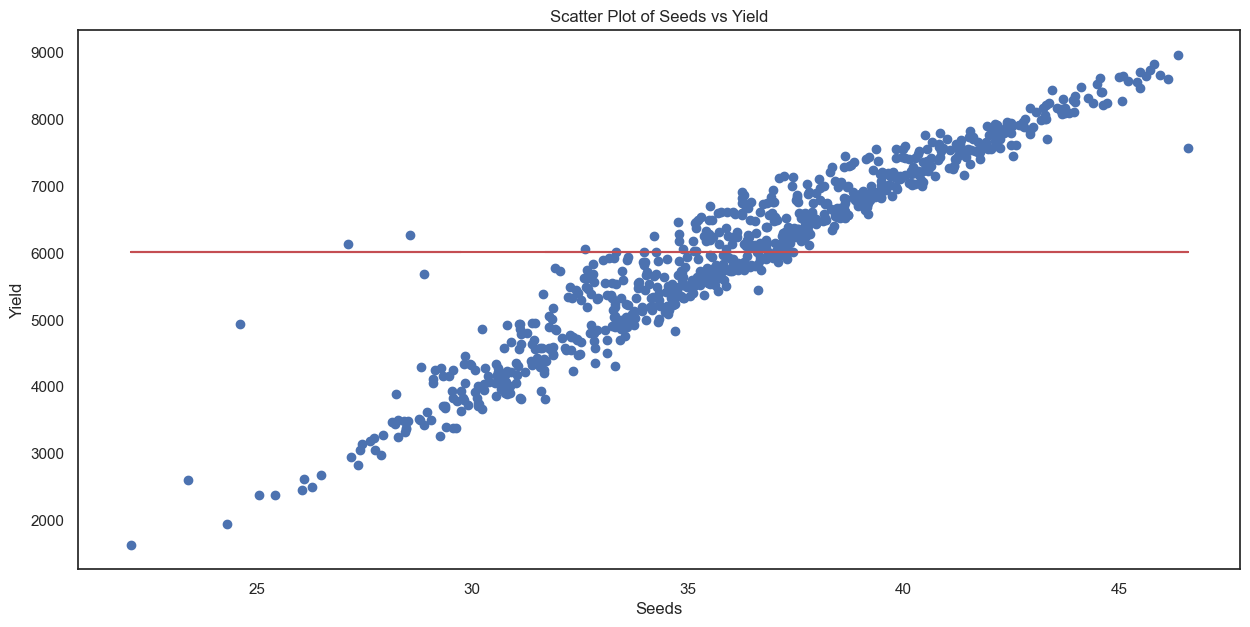

In [38]:
# seeds
# from Microsoft Copilot 
draw_scatter_plot(df['seeds'], df['yield'], 'Scatter Plot of Seeds vs Yield', 'Seeds', 'Yield')

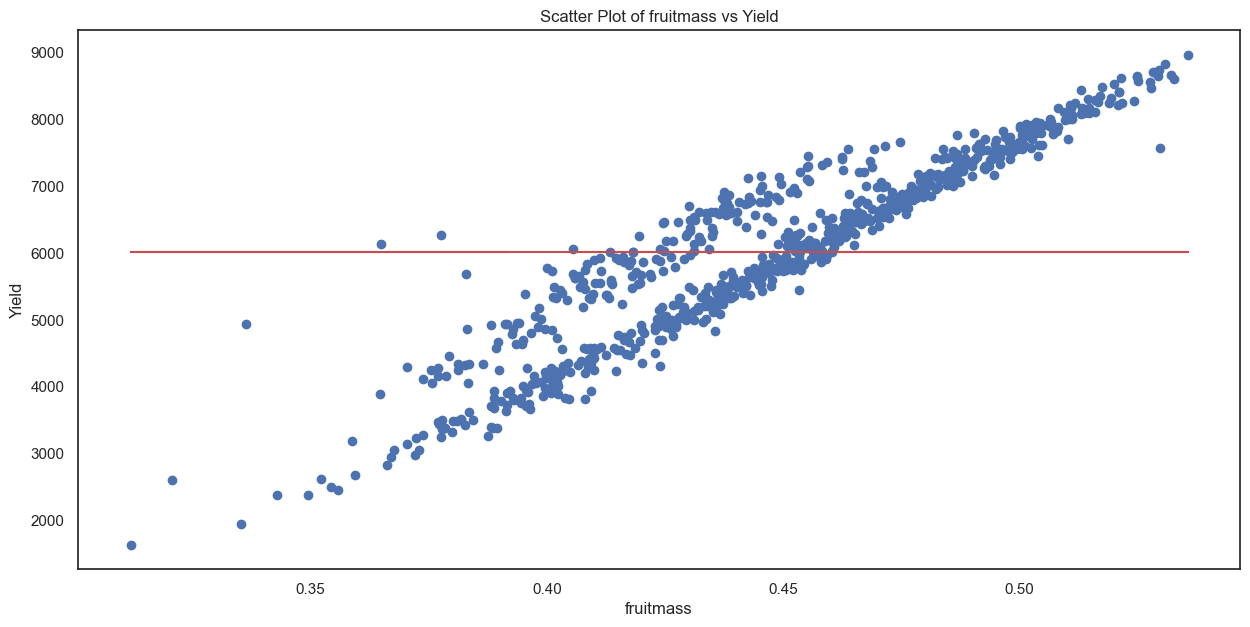

In [39]:
# fruitmass      
# from Microsoft Copilot 
draw_scatter_plot(df['fruitmass'], df['yield'], 'Scatter Plot of fruitmass vs Yield', 'fruitmass', 'Yield')

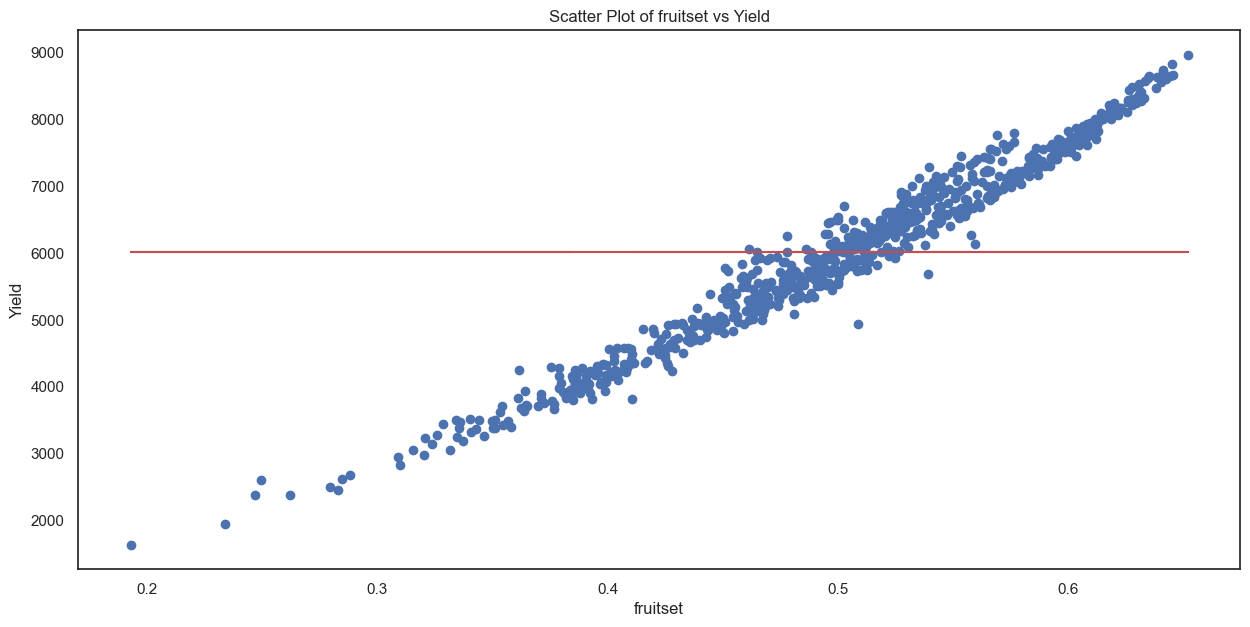

In [40]:
# fruitset
# from Microsoft Copilot 
draw_scatter_plot(df['fruitset'], df['yield'], 'Scatter Plot of fruitset vs Yield', 'fruitset', 'Yield')

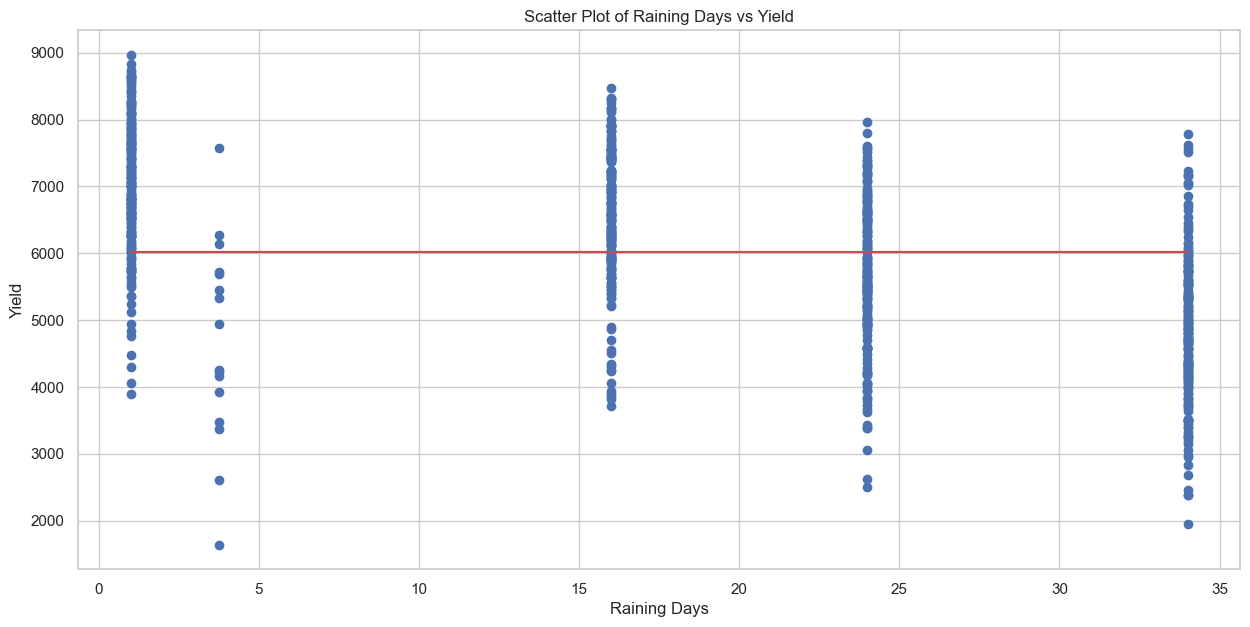

In [41]:
# RainingDays
# from Microsoft Copilot 
sns.set_style("whitegrid")
draw_scatter_plot(df['RainingDays'], df['yield'], 'Scatter Plot of Raining Days vs Yield', 'Raining Days', 'Yield')

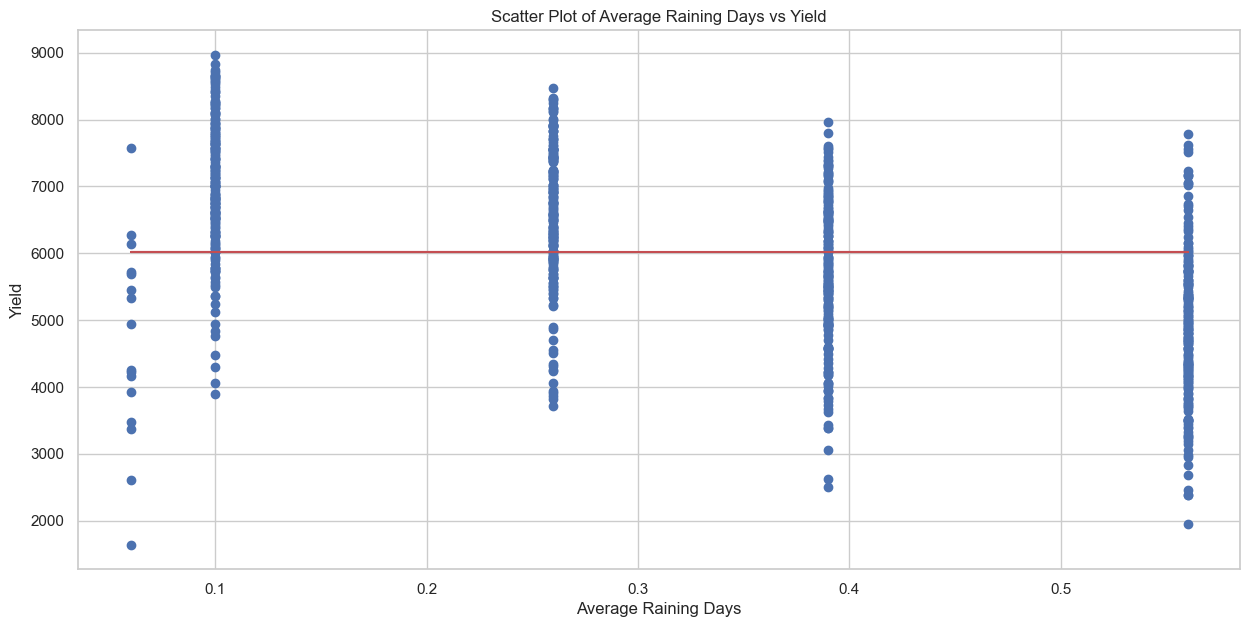

In [42]:
# AverageRainingDays
# from Microsoft Copilot 
sns.set_style("whitegrid")
draw_scatter_plot(df['AverageRainingDays'], df['yield'], 'Scatter Plot of Average Raining Days vs Yield', 'Average Raining Days', 'Yield')

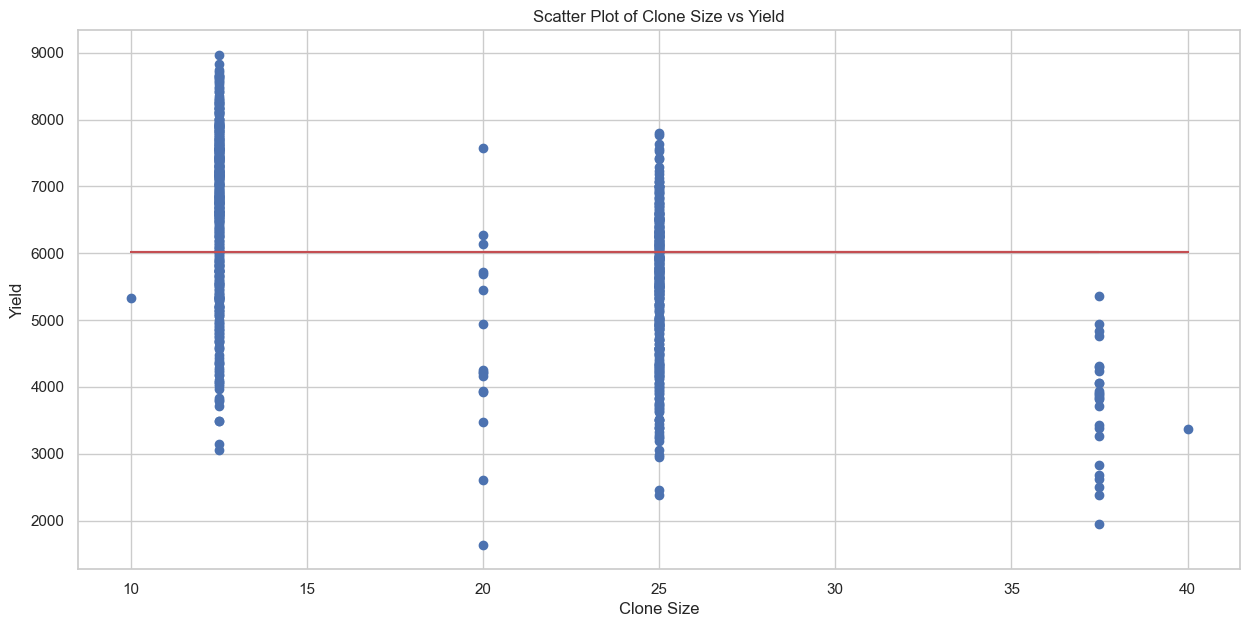

In [43]:
# clonesize
# from Microsoft Copilot 
sns.set_style("whitegrid")
draw_scatter_plot(df['clonesize'], df['yield'], 'Scatter Plot of Clone Size vs Yield', 'Clone Size', 'Yield')

### 6.e Box Plots

A box plot, also known as a whisker plot, visually shows the distribution of numerical data and skewness by displaying the data quartiles (or percentiles) and averages. 

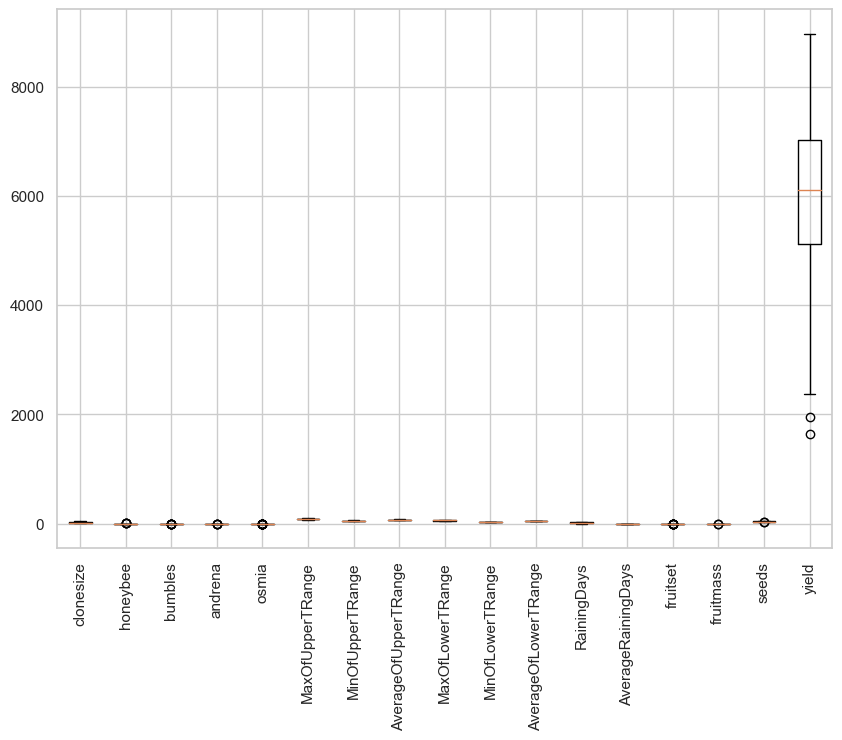

In [44]:
# from Microsoft Copilot 
fig = plt.figure(figsize=(10, 7))
#plt.boxplot(df)
#plt.show()

# Create the boxplot
plt.boxplot(df)

# Set the x-tick labels to be the column names of the DataFrame and show vertically
plt.xticks(range(1, len(df.columns) + 1), df.columns, rotation='vertical')

plt.show()

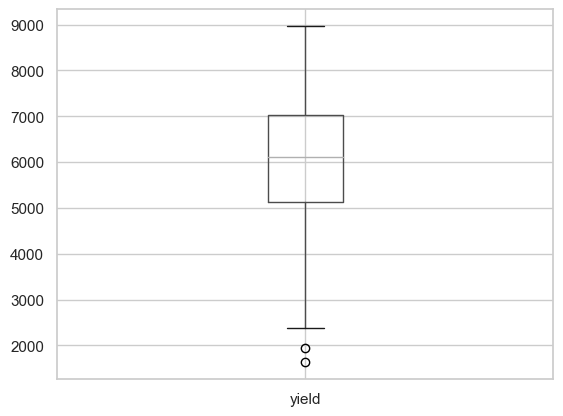

In [45]:
# Box Plot of yield
# from Microsoft Copilot 
df.boxplot(column='yield')
plt.show()

# 7. Select the outcome/response/target variable = (y)

- Dependent variables Outputs
- A covariate is a variable that is possibly predictive of the response. It could also represent an interacting variable.
- A confounding variable is one which influences the response but has not been measured (i.e. it introduces bias).

In [46]:
# Target Variable
y = df['yield']

# 8. Select features Predictors = (X)

- Independent variables / Inputs 
- A predictor is a feature that is useful in modelling the response. Specifically, its inclusion enables a model to account for more of the variance in
the response.


In [47]:
# Check correlation
df.corr()['yield'].sort_values()

AverageRainingDays     -0.541215
RainingDays            -0.540069
clonesize              -0.516737
MaxOfLowerTRange       -0.187439
MaxOfUpperTRange       -0.187075
MinOfLowerTRange       -0.183339
AverageOfUpperTRange   -0.181774
AverageOfLowerTRange   -0.181293
MinOfUpperTRange       -0.175883
honeybee               -0.044250
andrena                 0.140277
bumbles                 0.309407
osmia                   0.380892
fruitmass               0.930365
seeds                   0.961249
fruitset                0.984081
yield                   1.000000
Name: yield, dtype: float64

In [48]:
# Highlight specific correlations (asked Chat GPT how to do this)

# Assuming df is your DataFrame
df_corr = df.corr()
df_corr_yield = df_corr['yield'].sort_values()

# Create a DataFrame with highlighted correlations
highlighted_df = pd.DataFrame(index=df_corr_yield.index)
highlighted_df['Correlation'] = df_corr_yield

# Define a threshold for highlighting (change as needed)
threshold = 0.5

# Apply conditional formatting
highlighted_df = highlighted_df.style.applymap(lambda x: f'background-color: {"lightcoral" if abs(x) > threshold and x != 1 else ""}', subset=['Correlation'])

# Display the highlighted DataFrame
highlighted_df


,Correlation
AverageRainingDays,-0.541215
RainingDays,-0.540069
clonesize,-0.516737
MaxOfLowerTRange,-0.187439
MaxOfUpperTRange,-0.187075
MinOfLowerTRange,-0.183339
AverageOfUpperTRange,-0.181774
AverageOfLowerTRange,-0.181293
MinOfUpperTRange,-0.175883
honeybee,-0.044250


In [49]:
# I chose the feature which are strongly correlated with yeild
predictor_columns = ['AverageRainingDays','RainingDays', 'clonesize', 'fruitmass', 'seeds', 'fruitset']

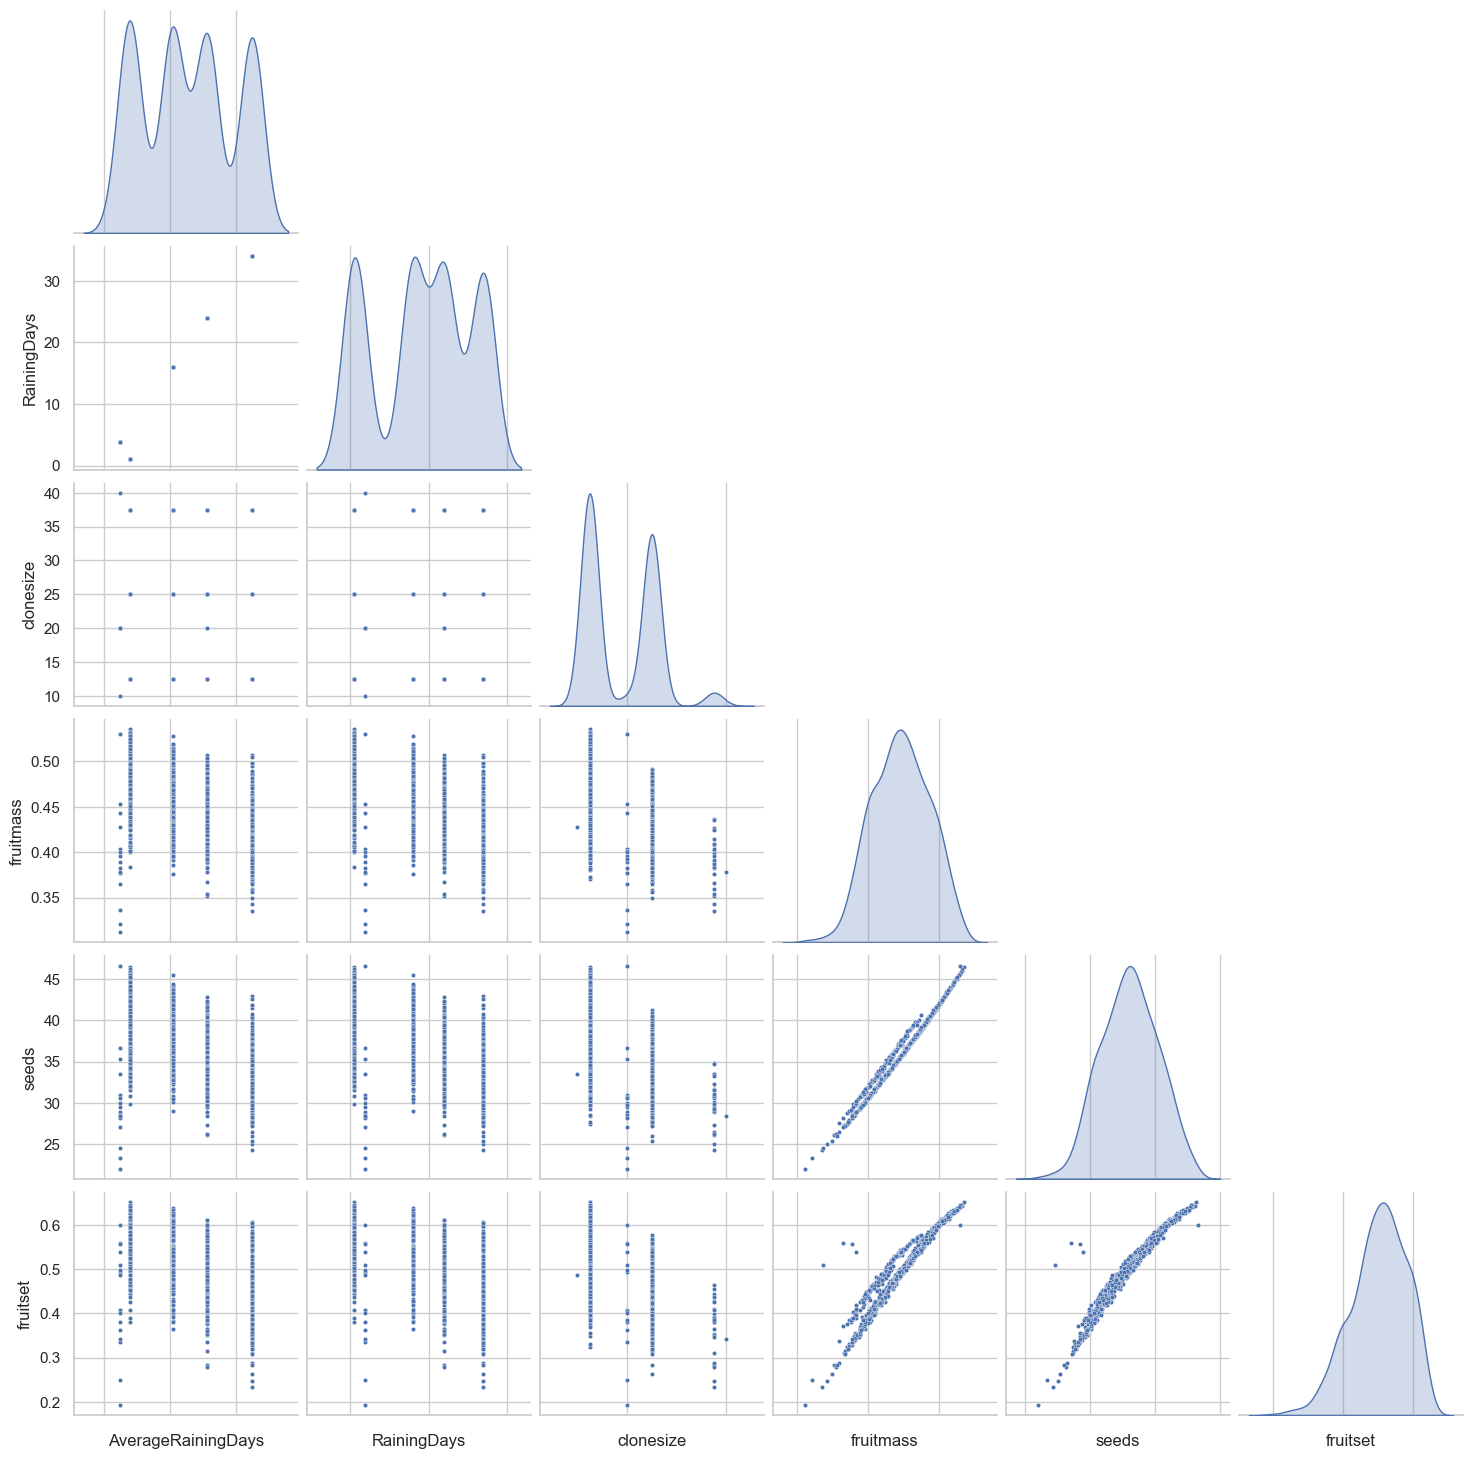

In [50]:
# Pairplot of selected features
# from Microsoft Copilot 
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

g = sns.pairplot(
    df[predictor_columns],
    palette = 'seismic',
    height=2.5, # Adjust this value as needed
    diag_kind ='kde',
    diag_kws = dict(shade=True),
    plot_kws = dict(s = 10),
    corner=True # This makes it a corner plot
)

# Remove x-tick labels
g.set(xticklabels = [])

# Display the plot
plt.show()

In [51]:
# X = df[predictor_columns]
Pred = df[predictor_columns]
Pred.head()

,AverageRainingDays,RainingDays,clonesize,fruitmass,seeds,fruitset
Row#,,,,,,
0,0.26,16.0,37.5,0.408159,31.678898,0.410652
1,0.10,1.0,37.5,0.425458,33.449385,0.444254
2,0.26,16.0,37.5,0.399172,30.546306,0.383787
3,0.10,1.0,37.5,0.408789,31.562586,0.407564
4,0.39,24.0,37.5,0.382703,28.873714,0.354413


# 9. Feature Engineering

> Feature Engineering can be described as the process of transforming the
variables into forms or domains suitable both to the underlying problem and
to computation

> There are no specific rules in cases when the data manipulation relates to
particular problems, industries or businesses

> Feature Engineering is typically performed before splitting the data into training and test sets. 
However, it’s important to note that the actual transformations or computations you perform during feature engineering should be
based on the training set only, and then applied to the test set.

> When you perform feature engineering, you’re creating new features based on the existing ones. If you were to perform feature
engineering after splitting the data, you might end up with different features in your training and test sets, which would make
it impossible to train and evaluate a model.

> However, any computation involved in feature engineering, such as calculating means or standard deviations for normalization, 
or fitting a PCA transformation, should be done on the training set only. Then, these computations are applied to the test set. 
This is to prevent data leakage, where information from the test set could influence the model training process, 
leading to overly optimistic performance estimates.

In [52]:
# e.g from Lab 2.2.1

# def create_fare_class(x):
#    if x > 30:
#        fare_class = 1
#    elif x > 20 and x <= 30:
#        fare_class = 2
#    elif x > 10 and x <= 20:
#        fare_class = 3
#    else:
#        fare_class = 4
#    return fare_class

# 10. Select approaches/models (at least a few) and evaluate them:

It’s not recommended to perform linear regression on your data before splitting it into a training set and a test set. Here’s why:

When you’re building a machine learning model, the goal is to create a model that can generalize well to new, unseen data. To evaluate how well your model can generalize, you need to test it on data that it hasn’t seen during the training process. This is the purpose of the test set.

If you perform linear regression before splitting the data, your model will be trained on the entire dataset. This means that when you evaluate your model on the test set, you’re not really testing how the model generalizes to new data, because it has already seen all of the data during training. This can lead to overly optimistic performance estimates, a problem known as overfitting.

Therefore, it’s crucial to split your data into a training set and a test set before training your model. The model is then trained on the training set and evaluated on the test set. This gives you a more realistic estimate of how the model will perform on new, unseen data.

### 10.1 Linear Regression - Drop the target variable

Initially, you can create your features matrix (X) by dropping the target variable from your dataframe. This will include all other columns as potential predictors

In [ ]:
# From Lab 4.2.1 and Lab 4.2.2

### 10.1a Set X and y

In [53]:
X_drop = df.drop('yield', axis=1)
# X = df[predictor_columns]
# X = df['fruitset'].values.reshape(-1,1)

In [54]:
X_drop

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
Row#,,,,,,,,,,,,,,,,
0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898
1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385
2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306
3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586
4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240


In [55]:
# y from above
# y = df['yield']
y

Row#
0      3813.165795
1      4947.605663
2      3866.798965
3      4303.943030
4      3436.493543
          ...     
772    5333.873335
773    3373.436842
774    4203.027624
775    4166.299735
776    3943.131681
Name: yield, Length: 777, dtype: float64

### 10.1b Split the Data

In [56]:
# Split the data into training and test sets
X_drop_train, X_drop_test, y_drop_train, y_drop_test = train_test_split(X_drop, y, test_size=0.2, random_state=42)

### 10.1c Check Shape, Sample of Test Train Data

In [57]:
## Check training/test data

# About training
print('X_drop_train is a %s' % type(X_drop_train))
print('X_drop_train has %d rows', X_drop_train.shape[0])
print('')
print('Sample of X_drop_train%s' % ('_'*50))
print(X_drop_train[:10])

print('')
print('y_drop_train is a %s' % type(y_drop_train))
print('y_drop_train has %d rows', y_drop_train.shape)
print('')
print('Sample of y_drop_train%s' % ('_'*50))
print(y_drop_train[:10])

X_drop_train is a <class 'pandas.core.frame.DataFrame'>
X_drop_train has %d rows 621

Sample of X_drop_train__________________________________________________
      clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
Row#                                                                   
739        25.0      0.50     0.38     0.50   0.75              69.7   
133        12.5      0.25     0.25     0.38   0.25              94.6   
234        12.5      0.25     0.25     0.50   0.63              94.6   
55         12.5      0.25     0.25     0.25   0.25              86.0   
639        25.0      0.50     0.25     0.75   0.75              94.6   
593        25.0      0.50     0.25     0.63   0.75              77.4   
382        12.5      0.25     0.38     0.38   0.63              69.7   
541        25.0      0.50     0.25     0.50   0.75              86.0   
412        12.5      0.25     0.38     0.50   0.50              77.4   
306        12.5      0.25     0.25     0.63   0.7

### 10.1d Check training/test data

In [58]:
# About test
print('X_drop_train is a %s' % type(X_drop_test))
print('X_drop_train has %d rows', X_drop_test.shape)
print('')
print('Sample of X_drop_train%s' % ('_'*50))
print(X_drop_test[:10])

print('')
print('y_drop_train is a %s' % type(y_drop_test))
print('y_drop_train has %d rows', y_drop_test.shape)
print('')
print('Sample of y_drop_train%s' % ('_'*50))
print(y_drop_test[:10])

X_drop_train is a <class 'pandas.core.frame.DataFrame'>
X_drop_train has %d rows (156, 16)

Sample of X_drop_train__________________________________________________
      clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
Row#                                                                   
568        25.0      0.50     0.25     0.63   0.50              69.7   
530        25.0      0.50     0.25     0.50   0.63              77.4   
610        25.0      0.50     0.25     0.75   0.50              77.4   
109        12.5      0.25     0.25     0.25   0.63              69.7   
586        25.0      0.50     0.25     0.63   0.75              86.0   
209        12.5      0.25     0.25     0.38   0.75              69.7   
519        25.0      0.50     0.25     0.50   0.50              69.7   
383        12.5      0.25     0.38     0.38   0.63              77.4   
479        25.0      0.50     0.25     0.38   0.63              94.6   
465        25.0      0.50     0.25     0.38

### 10.1e Create a LinearRegression model

In [59]:
linreg_drop = LinearRegression()

### 10.1f Train the model on the training set

In [60]:
linreg_drop.fit(X_drop_train, y_drop_train)

LinearRegression()

### 10.1g Evaluate the model on the test set

In [61]:
score_drop = linreg_drop.score(X_drop_test, y_drop_test)
score_drop
# 0.991345909119207 X = df.drop('yield', axis=1)
# 0.9862191125984163 X = df[predictor_columns]
# 0.9716158950557612 X = df['fruitset'].values.reshape(-1,1)
# 0.9913426419593161 on 15/01/2024

0.9913426419593161

This is calculating the $R^2$ score of your model on the **test data only**. Since the model was not trained on this data, this score gives you a better idea of how well the model can generalize to new, unseen data. This is typically the more important metric, as the goal of a machine learning model is to perform well on new data.

In [62]:
# Print the the coefficients and the intercept of a linear regression model
print(linreg_drop.coef_, linreg_drop.intercept_)

# [-9.16269764e+00  5.34890905e+01  3.37894798e+02  3.82958873e+02
#  5.42577497e+02 -1.02015762e+13  1.59878719e+13 -1.02444436e+13
#  2.50756374e+13 -8.63003941e+12 -1.02444436e+13  2.38018959e+00
# -1.10883774e+03  8.54912332e+03 -2.75643706e+04  3.60809770e+02] 7171110523618.245

# [ 3.34479756e+01 -6.76352143e+00  3.02238947e+00 -2.94721193e+04
#  3.51691288e+02  1.19364978e+04] 514.0637825239719

# [16785.49675868] -2416.586359525698

[-9.16393239e+00  5.34796356e+01  3.39650731e+02  3.82659398e+02
  5.42637576e+02 -3.16334106e+13  4.65273630e+13 -3.07398731e+13
  7.46450547e+13 -1.92226146e+13 -3.07398731e+13  2.36626618e+00
 -1.10712495e+03  8.54905665e+03 -2.75714317e+04  3.60906170e+02] 21517911198549.496


- linreg.coef_ returns the coefficients of the predictor variables in the model. The coefficients represent the change in the response variable for a one unit change in the predictor variable, assuming all other predictors remain constant.

- linreg.intercept_ returns the intercept of the model. The intercept is the predicted value of the response variable when all predictor variables are zero.

In [63]:
X_drop.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

In [64]:
# y = -9.16269764e+00*clonesize + 5.34890905e+01*honeybee + 3.37894798e+02*bumbles + 3.82958873e+02*andrena...

### 10.1h Find R Score of the entire dataset (both training and test data)

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

In [65]:
# Find R Score
linreg_drop.score(X_drop, y)

# 0.9917068766412912 X = df.drop('yield', axis=1)
# 0.9857954428966742 X = df[predictor_columns]
# 0.9684132908271317 X = df['fruitset'].values.reshape(-1,1)
# 0.9917062228293996 on 15/01/2024

0.9917062228293996

This is calculating the $R^2$ score of your model on the entire dataset (both training and test data). It gives you an idea of how well the model fits the **entire** dataset. However, this score might be overly optimistic because the model was trained on this data.

### 10.1i Find coefficients

In [66]:
linreg_drop_coef_df = pd.DataFrame({'feature': X_drop.columns, 'coefficient': linreg_drop.coef_})
linreg_drop_coef_df

,feature,coefficient
0,clonesize,-9.163932e+00
1,honeybee,5.347964e+01
2,bumbles,3.396507e+02
3,andrena,3.826594e+02
4,osmia,5.426376e+02
5,MaxOfUpperTRange,-3.163341e+13
6,MinOfUpperTRange,4.652736e+13
7,AverageOfUpperTRange,-3.073987e+13
8,MaxOfLowerTRange,7.464505e+13
9,MinOfLowerTRange,-1.922261e+13


### 10.1j Make Predictions

In [67]:
# Make predictions
predictions_linreg_drop = linreg_drop.predict(X_drop_test)
predictions_linreg_drop

# array([4199.47265625, 6707.32617188, 6320.20996094, 6894.87695312,

array([4198.9453125 , 6706.8671875 , 6319.44140625, 6894.49609375,
       6873.1640625 , 6678.953125  , 4908.59765625, 7628.93359375,
       3882.296875  , 6017.703125  , 4357.47265625, 6191.578125  ,
       8522.92578125, 4441.53125   , 5395.203125  , 6153.67578125,
       3058.21484375, 4328.5078125 , 5291.140625  , 6530.2421875 ,
       7010.87890625, 5022.2578125 , 5710.04296875, 5788.        ,
       3962.890625  , 7062.01953125, 6789.390625  , 5425.04296875,
       3775.8671875 , 6079.40625   , 6900.98046875, 5573.78125   ,
       5403.18359375, 5134.08203125, 6051.51953125, 7608.46484375,
       4104.8984375 , 5871.45703125, 5457.25390625, 7695.6171875 ,
       6763.96484375, 5395.18359375, 5703.90234375, 6178.20703125,
       4399.8359375 , 6247.55859375, 6907.2109375 , 5742.6796875 ,
       6965.96875   , 7011.12890625, 3960.16015625, 7112.34375   ,
       5499.20703125, 3786.83984375, 8178.27734375, 6084.90234375,
       8227.625     , 5528.390625  , 2954.640625  , 6777.94531

In [68]:
# Prediction
# Help from Chat GPT for the code

# Replace these values with your specific data
clonesize = 10 # Replace with a reasonable value
honeybee = 25.0 # Replace with a reasonable value
bumbles = 50.0 # Replace with a reasonable value
andrena = 40.0 # Replace with a reasonable value
osmia = 60.0 # Replace with a reasonable value
MaxOfUpperTRange = 77.0  # Replace with a reasonable value
MinOfUpperTRange = 40.0   # Replace with a reasonable value
AverageOfUpperTRange = 55.0  # Replace with a reasonable value
MaxOfLowerTRange = 64.0   # Replace with a reasonable value
MinOfLowerTRange = 44.0   # Replace with a reasonable value
AverageOfLowerTRange = 65.0   # Replace with a reasonable value
RainingDays = 15 # Replace with a reasonable value
AverageRainingDays = 1 # Replace with a reasonable value
fruitset = 29.742583 # Replace with a reasonable value
fruitmass = 0.384646 # Replace with a reasonable value
seeds = 33.33 # Replace with a reasonable value

# Create a dictionary
data_drop = {'clonesize': [clonesize],
        'honeybee': [honeybee],
        'bumbles': [bumbles],
        'andrena': [andrena],
        'osmia': [osmia],
        'MaxOfUpperTRange': [MaxOfUpperTRange],
        'MinOfUpperTRange': [MinOfUpperTRange],
        'AverageOfUpperTRange': [AverageOfUpperTRange],
        'MaxOfLowerTRange': [MaxOfLowerTRange],
        'MinOfLowerTRange': [MinOfLowerTRange],
        'AverageOfLowerTRange': [AverageOfLowerTRange],
        'RainingDays': [RainingDays],
        'AverageRainingDays': [AverageRainingDays],
        'fruitset': [fruitset],
        'fruitmass': [fruitmass],
        'seeds': [seeds]}

# Convert the dictionary to a DataFrame
x_drop = pd.DataFrame(data_drop)

# Make a prediction
Ypred_drop = linreg_drop.predict(x_drop)
print('Predicted yield: ', Ypred_drop[0])

# Predicted yield:  -143049555533997.38 # this was a consistent result but now (15/1) I get Predicted yield: -310456498056284.75

Predicted yield:  -310456498056284.75


In [69]:
# Predict price from X_test

y_preds_drop = linreg_drop.predict(X_drop_test)

y_preds_drop[:10]

# array([4199.47265625, 6707.32617188, 6320.20996094, 6894.87695312,
#       6873.18652344, 6679.25390625, 4909.21191406, 7628.70117188,
#       3882.26855469, 6018.13378906])

# array now 15/01/2024
# array([4198.9453125 , 6706.8671875 , 6319.44140625, 6894.49609375,
#       6873.1640625 , 6678.953125  , 4908.59765625, 7628.93359375,
#       3882.296875  , 6017.703125  ])

array([4198.9453125 , 6706.8671875 , 6319.44140625, 6894.49609375,
       6873.1640625 , 6678.953125  , 4908.59765625, 7628.93359375,
       3882.296875  , 6017.703125  ])

In [70]:
# from sklearn.metrics import mean_squared_error

mean_squared_error(y_drop_test, y_preds_drop, squared=True)

# 16820.330878979163 consistently was this result, now
# On 15/01/2024 16826.681021490276

16826.681021490276

### 10.2 Linear Regression - highly correlated Pearson Correlation Features and the target variable (yield)
A simple algorithm that models a linear relationship between inputs and a continuous numerical output variable

### 10.2a Set X and y

In [71]:
# X_drop = df.drop('yield', axis=1)
X_features = df[predictor_columns]
# X_fruitset = df['fruitset'].values.reshape(-1,1)

In [72]:
X_features

,AverageRainingDays,RainingDays,clonesize,fruitmass,seeds,fruitset
Row#,,,,,,
0,0.26,16.00,37.5,0.408159,31.678898,0.410652
1,0.10,1.00,37.5,0.425458,33.449385,0.444254
2,0.26,16.00,37.5,0.399172,30.546306,0.383787
3,0.10,1.00,37.5,0.408789,31.562586,0.407564
4,0.39,24.00,37.5,0.382703,28.873714,0.354413
...,...,...,...,...,...,...
772,0.06,3.77,10.0,0.428012,33.447471,0.486815
773,0.06,3.77,40.0,0.377915,28.462005,0.342841
774,0.39,24.00,20.0,0.401670,30.748240,0.404617


In [73]:
# y from above
# y = df['yield']
y

Row#
0      3813.165795
1      4947.605663
2      3866.798965
3      4303.943030
4      3436.493543
          ...     
772    5333.873335
773    3373.436842
774    4203.027624
775    4166.299735
776    3943.131681
Name: yield, Length: 777, dtype: float64

### 10.2b Split the Data

In [74]:
# Split the data into training and test sets
X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(X_features, y, test_size = 0.2, random_state=42)

### 10.2c Check Shape, Sample of Test Train Data

In [75]:
## Check training/test data

# About training
print('X_train_features is a %s' % type(X_train_features))
print('X_train_features has %d rows', X_train_features.shape[0])
print('')
print('Sample of X_train_features%s' % ('_'*50))
print(X_train_features[:10])

print('')
print('y_train_features is a %s' % type(y_train_features))
print('y_train_features has %d rows', y_train_features.shape)
print('')
print('Sample of y_train_features%s' % ('_'*50))
print(y_train_features[:10])

X_train_features is a <class 'pandas.core.frame.DataFrame'>
X_train_features has %d rows 621

Sample of X_train_features__________________________________________________
      AverageRainingDays  RainingDays  clonesize  fruitmass      seeds  \
Row#                                                                     
739                 0.26         16.0       25.0   0.431072  35.184412   
133                 0.26         16.0       12.5   0.444588  35.384612   
234                 0.56         34.0       12.5   0.401091  30.665221   
55                  0.39         24.0       12.5   0.429452  33.669875   
639                 0.39         24.0       25.0   0.404869  31.231910   
593                 0.26         16.0       25.0   0.452310  36.436436   
382                 0.10          1.0       12.5   0.469360  39.816611   
541                 0.39         24.0       25.0   0.431122  33.942014   
412                 0.10          1.0       12.5   0.520004  44.495423   
306            

### 10.2d Check training/test data

In [76]:
# About test
print('X_train_features is a %s' % type(X_test_features))
print('X_train_features has %d rows', X_test_features.shape)
print('')
print('Sample of X_train_features%s' % ('_'*50))
print(X_test_features[:10])

print('')
print('y_train_features is a %s' % type(y_test_features))
print('y_train_features has %d rows', y_test_features.shape)
print('')
print('Sample of y_train_features%s' % ('_'*50))
print(y_test_features[:10])

X_train_features is a <class 'pandas.core.frame.DataFrame'>
X_train_features has %d rows (156, 6)

Sample of X_train_features__________________________________________________
      AverageRainingDays  RainingDays  clonesize  fruitmass      seeds  \
Row#                                                                     
568                 0.56         34.0       25.0   0.376880  29.284336   
530                 0.10          1.0       25.0   0.466475  38.060375   
610                 0.10          1.0       25.0   0.452680  36.386359   
109                 0.26         16.0       12.5   0.453001  37.970243   
586                 0.10          1.0       25.0   0.471829  38.705696   
209                 0.39         24.0       12.5   0.443192  36.957873   
519                 0.39         24.0       25.0   0.391211  31.078830   
383                 0.39         24.0       12.5   0.501204  42.128819   
479                 0.39         24.0       25.0   0.391617  29.908518   
465       

### 10.2e Create a LinearRegression model

In [77]:
linreg_features = LinearRegression()

### 10.2f Train the model on the training set

In [78]:
linreg_features.fit(X_train_features, y_train_features)

LinearRegression()

### 10.2g Evaluate the model on the test set

In [79]:
score = linreg_features.score(X_test_features, y_test_features)
score
# 0.9857954428966742 X = df[predictor_columns]
# 0.9862191125984163 X_features = df[predictor_columns]
# 0.9862191125984168 on 15/01/2024

0.9862191125984168

This is calculating the $R^2$ score of your model on the **test data only**. Since the model was not trained on this data, this score gives you a better idea of how well the model can generalize to new, unseen data. This is typically the more important metric, as the goal of a machine learning model is to perform well on new data.

In [80]:
# Print the the coefficients and the intercept of a linear regression model
print(linreg_features.coef_, linreg_features.intercept_)

# [ 3.34479756e+01 -6.76352143e+00  3.02238947e+00 -2.94721193e+04
#  3.51691288e+02  1.19364978e+04] 514.0637825239719

[ 3.34479756e+01 -6.76352143e+00  3.02238947e+00 -2.94721193e+04
  3.51691288e+02  1.19364978e+04] 514.0637825239373


- linreg.coef_ returns the coefficients of the predictor variables in the model. The coefficients represent the change in the response variable for a one unit change in the predictor variable, assuming all other predictors remain constant.

- linreg.intercept_ returns the intercept of the model. The intercept is the predicted value of the response variable when all predictor variables are zero.

In [81]:
X_features.columns

# Index(['AverageRainingDays', 'RainingDays', 'clonesize', 'fruitmass', 'seeds',
#       'fruitset'],
#      dtype='object')

Index(['AverageRainingDays', 'RainingDays', 'clonesize', 'fruitmass', 'seeds',
       'fruitset'],
      dtype='object')

In [82]:
# y = 3.34479756e+01*AverageRainingDays - -6.76352143e+00*RainingDays + 3.02238947e+00*clonesize

### 10.2h Find R Score of the entire dataset (both training and test data)

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

In [83]:
# Find R Score
linreg_features.score(X_features, y)
# 0.9857954428966742
# 0.9857954428966743 on 15/01/2024

0.9857954428966743

This is calculating the $R^2$ score of your model on the entire dataset (both training and test data). It gives you an idea of how well the model fits the **entire** dataset. However, this score might be overly optimistic because the model was trained on this data.

### 10.2i Find coefficients

In [84]:
linreg_features_coef_df = pd.DataFrame({'feature': X_features.columns, 'coefficient': linreg_features.coef_})
linreg_features_coef_df

,feature,coefficient
0,AverageRainingDays,33.447976
1,RainingDays,-6.763521
2,clonesize,3.022389
3,fruitmass,-29472.119303
4,seeds,351.691288
5,fruitset,11936.497849


### 10.2j Make Predictions

In [85]:
# Make predictions
predictions_features = linreg_features.predict(X_features)
predictions_features

# array([4541.51259496, 5151.54476408, 4087.36334584, 4541.27135377,

array([4541.51259496, 5151.54476408, 4087.36334584, 4541.27135377,
       3584.14359543, 2934.54924778, 2673.24946529, 2062.71785395,
       4785.65990237, 5563.27899592, 4219.02850438, 4340.78043587,
       5059.94308886, 3817.61524901, 4143.46813291, 3574.1914113 ,
       2577.13778676, 2612.71711505, 1874.20666895, 4830.6953359 ,
       5419.748636  , 4534.67013476, 4468.99600718, 4108.15331207,
       3414.79374645, 4843.23328266, 5396.60774268, 4354.47430266,
       4769.60945977, 3877.31051804, 3037.32109318, 3004.51354859,
       2155.97842738, 5055.90485695, 6067.91088382, 4705.92055944,
       5434.65596543, 4695.03579376, 4091.39463454, 3540.29530883,
       4981.90694614, 5803.80386542, 4600.84720068, 5523.99230991,
       4081.13790936, 3535.43633872, 3296.33428545, 2431.88271071,
       5332.01301701, 6309.01543401, 5028.41646968, 6176.34005974,
       6968.5035288 , 5637.02731347, 6246.60343277, 5161.13924386,
       4007.24560389, 3814.42084593, 2936.99471322, 6470.03219

In [86]:
# Prediction
# Help from Microsoft Copilot for the dictionary

AverageRainingDays = 1
RainingDays = 15
clonesize = 10
fruitmass = 0.384646
seeds = 0.392303
fruitset = 29.742583

# Create a dictionary
data_features = {'AverageRainingDays': [AverageRainingDays], 
        'RainingDays': [RainingDays], 
        'clonesize': [clonesize], 
        'fruitmass': [fruitmass], 
        'seeds': [seeds], 
        'fruitset': [fruitset]}

# Convert the dictionary to a DataFrame
x_features = pd.DataFrame(data_features)

# Make a prediction
Ypred_features = linreg_features.predict(x_features)
print('Predicted yield: ', Ypred_features[0])

# Predicted yield:  344300.1975937406
# Predicted yield:  344300.1975937409 15/01/2024

Predicted yield:  344300.1975937409


In [87]:
# Predict price from X_test

y_preds_features = linreg_features.predict(X_test_features)

y_preds_features[:10]

# array([4212.75951151, 6582.62971454, 6137.11721826, 6974.16297073,
#       6764.40552881, 6702.99947404, 4961.43734008, 7613.89178613,
#       3768.742705  , 5978.29155089])

array([4212.75951151, 6582.62971454, 6137.11721826, 6974.16297073,
       6764.40552881, 6702.99947404, 4961.43734008, 7613.89178613,
       3768.742705  , 5978.29155089])

In [88]:
# from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_features, y_preds_features, squared=True)

# 26784.91468295629
# 26784.91468295537 on 15/01/2024

26784.91468295537

### 10.3 Linear Regression - fruitset and the target variable (yield)
A simple algorithm that models a linear relationship between inputs and a continuous numerical output variable fruitset

### 10.3a Set X and y

In [89]:
X_fruitset = df['fruitset'].values.reshape(-1,1)

In [90]:
X_fruitset

array([[0.41065206],
       [0.44425436],
       [0.38378651],
       [0.40756415],
       [0.35441305],
       [0.30966946],
       [0.28444261],
       [0.246568  ],
       [0.42797703],
       [0.46436588],
       [0.37990623],
       [0.39897696],
       [0.43737474],
       [0.36488078],
       [0.38131422],
       [0.35013652],
       [0.28815909],
       [0.2795358 ],
       [0.23355449],
       [0.42622804],
       [0.45473742],
       [0.3925403 ],
       [0.38945263],
       [0.38463303],
       [0.34641077],
       [0.43301431],
       [0.46201336],
       [0.40331064],
       [0.4250109 ],
       [0.37667015],
       [0.32041739],
       [0.31550007],
       [0.26213964],
       [0.44778077],
       [0.5026216 ],
       [0.40737354],
       [0.45191056],
       [0.42606457],
       [0.39339477],
       [0.33702271],
       [0.44341991],
       [0.4872149 ],
       [0.4190151 ],
       [0.46627946],
       [0.39196494],
       [0.35099277],
       [0.33552977],
       [0.283

In [91]:
# y from above
# y = df['yield']
y

Row#
0      3813.165795
1      4947.605663
2      3866.798965
3      4303.943030
4      3436.493543
          ...     
772    5333.873335
773    3373.436842
774    4203.027624
775    4166.299735
776    3943.131681
Name: yield, Length: 777, dtype: float64

### 10.3b Split the Data

In [92]:
# Split the data into training and test sets
X_fruitset_train, X_fruitset_test, y_fruitset_train, y_fruitset_test = train_test_split(X_fruitset, y, test_size=0.2, random_state=42)

### 10.3c Check Shape, Sample of Test Train Data

In [93]:
## Check training/test data

# About training
print('X_fruitset_train is a %s' % type(X_fruitset_train))
print('X_fruitset_train has %d rows', X_fruitset_train.shape[0])
print('')
print('Sample of X_fruitset_train%s' % ('_'*50))
print(X_fruitset_train[:10])

print('')
print('y_fruitset_train is a %s' % type(y_fruitset_train))
print('y_fruitset_train has %d rows', y_fruitset_train.shape)
print('')
print('Sample of y_fruitset_train%s' % ('_'*50))
print(y_fruitset_train[:10])

X_fruitset_train is a <class 'numpy.ndarray'>
X_fruitset_train has %d rows 621

Sample of X_fruitset_train__________________________________________________
[[0.49871589]
 [0.5004375 ]
 [0.40444605]
 [0.46697409]
 [0.40321733]
 [0.50679379]
 [0.5732048 ]
 [0.4602058 ]
 [0.63103393]
 [0.47617818]]

y_fruitset_train is a <class 'pandas.core.series.Series'>
y_fruitset_train has %d rows (621,)

Sample of y_fruitset_train__________________________________________________
Row#
739    6034.642135
133    5643.360448
234    4100.759169
55     4999.156215
639    4218.327986
593    6493.637124
382    7555.171595
541    5128.163506
412    8538.462001
306    5596.226357
Name: yield, dtype: float64


### 10.3d Check training/test data

In [94]:
# About test
print('X_fruitset_drop_train is a %s' % type(X_fruitset_test))
print('X_fruitset_train has %d rows', X_fruitset_test.shape)
print('')
print('Sample of X_fruitset_train%s' % ('_'*50))
print(X_fruitset_test[:10])

print('')
print('y_fruitset_train is a %s' % type(y_fruitset_test))
print('y_fruitset_train has %d rows', y_fruitset_test.shape)
print('')
print('Sample of y_fruitset_train%s' % ('_'*50))
print(y_fruitset_test[:10])

X_fruitset_drop_train is a <class 'numpy.ndarray'>
X_fruitset_train has %d rows (156, 1)

Sample of X_fruitset_train__________________________________________________
[[0.38895631]
 [0.53272871]
 [0.51066856]
 [0.54613583]
 [0.54216384]
 [0.53319621]
 [0.42900052]
 [0.60038843]
 [0.36456486]
 [0.4982611 ]]

y_fruitset_train is a <class 'pandas.core.series.Series'>
y_fruitset_train has %d rows (156,)

Sample of y_fruitset_train__________________________________________________
Row#
568    4282.700632
530    6801.492050
610    6279.338501
109    6898.390949
586    7004.015537
209    6779.981658
519    4936.011770
383    7604.315838
479    3723.523376
465    6037.686131
Name: yield, dtype: float64


### 10.3e Create a Linear Regression model

In [95]:
linreg_fruitset = LinearRegression()

### 10.3f Train the model on the training set

In [96]:
linreg_fruitset.fit(X_fruitset_train, y_fruitset_train)

LinearRegression()

### 10.3g Evaluate the model on the test set

In [97]:
score_fruitset = linreg_fruitset.score(X_fruitset_test, y_fruitset_test)
score_fruitset

# 0.9716158950557612 on 15/01/2024

0.9716158950557612

This is calculating the $R^2$ score of your model on the **test data only**. Since the model was not trained on this data, this score gives you a better idea of how well the model can generalize to new, unseen data. This is typically the more important metric, as the goal of a machine learning model is to perform well on new data.

In [98]:
# Print the the coefficients and the intercept of a linear regression model
print(linreg_fruitset.coef_, linreg_fruitset.intercept_)
# [16785.49675868] -2416.586359525698
# [16785.49675868] -2416.586359525696 on 15/01/2024

[16785.49675868] -2416.586359525696


In [99]:
X_fruitset.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### 10.3h Find R Score of the entire dataset (both training and test data)

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

In [100]:
# Find R Score
linreg_fruitset.score(X_fruitset, y)
# 0.9684132908271317

0.9684132908271317

This is calculating the $R^2$ score of your model on the entire dataset (both training and test data). It gives you an idea of how well the model fits the **entire** dataset. However, this score might be overly optimistic because the model was trained on this data.

### 10.3i Find coefficients

In [101]:
linreg_fruitset_coef_df = pd.DataFrame({'feature': X_fruitset.columns, 'coefficient': linreg_fruitset.coef_})
linreg_fruitset_coef_df

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [104]:
# Make predictions
predictions_fruitset = linreg_fruitset.predict(X_fruitset)
predictions_fruitset

# array([4476.41251291, 5040.4437435 , 4025.46082653, 4424.58044318,

array([4476.41251291, 5040.4437435 , 4025.46082653, 4424.58044318,
       3532.4127257 , 2781.36934078, 2357.9242158 , 1722.18007241,
       4767.22063997, 5378.02559727, 3960.32851667, 4280.4400422 ,
       4924.9658875 , 3708.11884083, 3983.96229468, 3460.6290956 ,
       2420.3071788 , 2275.5609221 , 1503.74180892, 4737.86307471,
       5216.40707958, 4172.3975402 , 4120.56946543, 4039.67015239,
       3398.09043034, 4851.77390387, 5338.53731329, 4353.18303058,
       4717.43265769, 3906.00918882, 2961.7787521 , 2879.23905961,
       1983.55776837, 5099.63632069, 6020.16691169, 4421.3808925 ,
       5168.9569645 , 4735.11906563, 4186.74029398, 3240.50726357,
       5026.43706894, 5761.55778199, 4616.79027693, 5410.14603851,
       4162.73978643, 3475.00162684, 3215.44747368, 2334.63351656,
       5340.02523008, 6240.89960152, 4785.94408947, 6344.60822254,
       7016.23260738, 5824.52048247, 6291.3322476 , 5421.80564742,
       4156.58813687, 3894.9247014 , 3017.33698389, 6616.12455

In [105]:
# ANSWER
beta0 = linreg_fruitset.intercept_
beta1 = linreg_fruitset.coef_

x1 = 0.192732 # fruitset test value

Ypred = beta1 * x1 + beta0
print('Predicted yield: ', Ypred[0])

# Predicted yield:  818.5160017683861
# Predicted yield:  818.5160017683875 on 15/01/2024

Predicted yield:  818.5160017683875


## 10.4 Cross validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. In your case, k is 5, so it’s a 5-fold cross-validation.

The results of your cross-validation show the performance of your linear regression model on both the training and test sets for each fold. The performance is measured in terms of R-squared (R2) and Root Mean Squared Error (RMSE).

- R-squared (R2): It is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable or variables in a regression model. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model’s inputs.

- Root Mean Squared Error (RMSE): It is the square root of the mean of the square of all of the error. RMSE is considered an excellent general-purpose error metric for numerical predictions. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

From your results, it seems like your model is performing quite well. The R2 values are close to 1, which means your model can explain most of the variability in the dependent variable. The RMSE values are relatively low, which indicates that your model’s predictions are pretty accurate. 

In [ ]:
# From lab 4.21 and Lab 4.2.2

In [106]:
# Cross Validation for X_drop
# Remember X_drop = df.drop('yield', axis=1) so all columns except yield

# Set up 5-fold cross validation  
k_fold_drop = KFold(5, shuffle=True, random_state=42)
train_scores_drop = []
train_rmse_drop = []
test_scores_drop = []
test_rmse_drop = []

for k, (train, test) in enumerate(k_fold_drop.split(X_drop)):
    
    # Get training and test sets for X and y
    X_drop_train = X_drop.iloc[train, ]
    y_drop_train = y.iloc[train, ]
    X_drop_test = X_drop.iloc[test, ]
    y_drop_test = y.iloc[test, ]
    
    # Fit model with training set
    linreg_drop.fit(X_drop_train, y_drop_train)
    
    # Make predictions with training and test set
    train_preds_drop = linreg_drop.predict(X_drop_train)
    test_preds_drop = linreg_drop.predict(X_drop_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores_drop.append(linreg_drop.score(X_drop_train, y_drop_train))
    test_scores_drop.append(linreg_drop.score(X_drop_test, y_drop_test))
    
    train_rmse_drop.append(mean_squared_error(y_drop_train, train_preds_drop, squared=False))
    test_rmse_drop.append(mean_squared_error(y_drop_test, test_preds_drop, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
drop_metrics_df = pd.DataFrame({'Training R2': train_scores_drop, 
                           'Test R2': test_scores_drop, 
                           'Training RMSE': train_rmse_drop, 
                           'Test RMSE': test_rmse_drop},
                          index=[i+1 for i in range(5)])

drop_metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.991776,0.991347,121.874007,129.682927
2,0.991594,0.992361,125.025163,115.854608
3,0.991671,0.991658,123.215999,123.374970
4,0.992051,0.990644,120.229210,133.896898
5,0.992044,0.990065,122.369451,128.506731


In [107]:
drop_metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.991827,0.991215,122.542766,126.263227
std,0.000211,0.000891,1.763899,6.922463
min,0.991594,0.990065,120.229210,115.854608
25%,0.991671,0.990644,121.874007,123.374970
50%,0.991776,0.991347,122.369451,128.506731
75%,0.992044,0.991658,123.215999,129.682927
max,0.992051,0.992361,125.025163,133.896898


In [108]:
# Cross Validation for X_features 
# Remember X_features = predictor_columns = ['AverageRainingDays','RainingDays', 'clonesize', 'fruitmass', 'seeds', 'fruitset']

# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True, random_state=42)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X_features)):
    
    # Get training and test sets for X and y
    X_train = X_features.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X_features.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    linreg_features.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = linreg_features.predict(X_train)
    test_preds = linreg_features.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(linreg_features.score(X_train, y_train))
    test_scores.append(linreg_features.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
features_metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

features_metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.985630,0.986219,161.105398,163.660975
2,0.985383,0.987808,164.867054,146.357886
3,0.986113,0.983962,159.098320,171.072846
4,0.986046,0.985032,159.296080,169.355932
5,0.986580,0.982456,158.927387,170.766775


In [109]:
features_metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.985950,0.985095,160.658848,164.242883
std,0.000463,0.002054,2.509918,10.435092
min,0.985383,0.982456,158.927387,146.357886
25%,0.985630,0.983962,159.098320,163.660975
50%,0.986046,0.985032,159.296080,169.355932
75%,0.986113,0.986219,161.105398,170.766775
max,0.986580,0.987808,164.867054,171.072846


In [110]:
# Cross Validation for Fruitset

X_fruitset_df = df[['fruitset']]
y_fruitset = df['yield']

# Set up 5-fold cross-validation  
k_fold_fruitset = KFold(5, shuffle=True, random_state=42)
train_scores_fruitset = []
train_rmse_fruitset = []
test_scores_fruitset = []
test_rmse_fruitset = []

# Initialize Linear Regression model
# linreg_fruitset = LinearRegression()

for k, (train, test) in enumerate(k_fold_fruitset.split(X_fruitset_df)):
    
    # Get training and test sets for X and y
    X_fruitset_train = X_fruitset_df.iloc[train, ]
    y_fruitset_train = y_fruitset.iloc[train, ]
    X_fruitset_test = X_fruitset_df.iloc[test, ]
    y_fruitset_test = y_fruitset.iloc[test, ]
    
    # Fit model with the training set
    linreg_fruitset.fit(X_fruitset_train, y_fruitset_train)
    
    # Make predictions with the training and test set
    train_preds_fruitset = linreg_fruitset.predict(X_fruitset_train)
    test_preds_fruitset = linreg_fruitset.predict(X_fruitset_test)
    
    # Score R2 and RMSE on the training and test sets and store in lists
    train_scores_fruitset.append(linreg_fruitset.score(X_fruitset_train, y_fruitset_train))
    test_scores_fruitset.append(linreg_fruitset.score(X_fruitset_test, y_fruitset_test))
    
    train_rmse_fruitset.append(mean_squared_error(y_fruitset_train, train_preds_fruitset, squared=False))
    test_rmse_fruitset.append(mean_squared_error(y_fruitset_test, test_preds_fruitset, squared=False))

# Create a metrics_df dataframe to display R2 and RMSE scores
fruitset_metrics_df = pd.DataFrame({'Training R2': train_scores_fruitset, 
                                    'Test R2': test_scores_fruitset, 
                                    'Training RMSE': train_rmse_fruitset, 
                                    'Test RMSE': test_rmse_fruitset},
                                   index=[i+1 for i in range(5)])

fruitset_metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.967434,0.971616,242.527893,234.878975
2,0.967784,0.970992,244.759688,225.758490
3,0.969200,0.963866,236.938591,256.778912
4,0.969142,0.965494,236.888801,257.137534
5,0.968473,0.968041,243.595393,230.478965


In [111]:
fruitset_metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.968407,0.968002,240.942073,241.006575
std,0.000792,0.003369,3.761183,14.915232
min,0.967434,0.963866,236.888801,225.758490
25%,0.967784,0.965494,236.938591,230.478965
50%,0.968473,0.968041,242.527893,234.878975
75%,0.969142,0.970992,243.595393,256.778912
max,0.969200,0.971616,244.759688,257.137534


In [112]:
X_fruitset_df

,fruitset
Row#,
0,0.410652
1,0.444254
2,0.383787
3,0.407564
4,0.354413
...,...
772,0.486815
773,0.342841
774,0.404617


In [113]:
y_fruitset

Row#
0      3813.165795
1      4947.605663
2      3866.798965
3      4303.943030
4      3436.493543
          ...     
772    5333.873335
773    3373.436842
774    4203.027624
775    4166.299735
776    3943.131681
Name: yield, Length: 777, dtype: float64

### 10.5 Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

> The goal is to improve the model’s performance, reduce overfitting, improve interpretability, and reduce training time

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

In [ ]:
# From Lab 4.3

In [114]:
# show_steps = True   # for testing/debugging
show_steps = False  # without showing steps

In [212]:
## Use Forward Feature Selection to pick a good model
# Remember X_drop = df.drop('yield', axis=1) so all columns except yield

# Forward Feature Selection on X_drop
# start with no predictors
included_drop = []
# keep track of model and parameters
best_drop = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model_drop = LinearRegression()
# get the number of cases in the training data
n_drop = X_drop_train.shape[0]

r2_list_drop = []
adjusted_r2_list_drop = []

while True:
    changed_drop = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded_drop = list(set(X_drop.columns) - set(included_drop))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded_drop))  

    # for each remaining feature to be evaluated
    for new_column_drop in excluded_drop:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column_drop)
            print('(Step) - Features = %s' % ', '.join(included_drop + [new_column_drop]))

        # fit the model with the Training data
        fit_drop = model_drop.fit(X_drop_train[included_drop + [new_column_drop]], y_drop_train)
        # calculate the score (R^2 for Regression)
        r2_drop = fit_drop.score(X_drop_train[included_drop + [new_column_drop]], y_drop_train)
        # number of predictors in this model
        k_drop = len(included_drop + [new_column_drop])
        # calculate the adjusted R^2
        adjusted_r2_drop = 1 - (((1 - r2_drop) * (n_drop - 1)) / (n_drop - k_drop - 1))

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.16f' % 
                  (adjusted_r2_drop, best_drop['a_r2']))

        # if model improves
        if adjusted_r2_drop > best_drop['a_r2']:
            # record new parameters
            best_drop = {'feature': new_column_drop, 'r2': r2_drop, 'a_r2': adjusted_r2_drop}
            # flag that found a better model
            changed_drop = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.16f' % 
                      (best_drop['feature'], best_drop['r2'], best_drop['a_r2']))
    # END for
    
    r2_list_drop.append(best_drop['r2'])
    adjusted_r2_list_drop.append(best_drop['a_r2'])

    # if found a better model after testing all remaining features
    if changed_drop:
        # update control details
        included_drop.append(best_drop['feature'])
        excluded_drop = list(set(excluded_drop) - set(best_drop['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.16f' % 
              (best_drop['feature'], best_drop['r2'], best_drop['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included_drop))

# Added feature fruitset with R^2 = 0.968 and adjusted R^2 = 0.968
# Added feature RainingDays with R^2 = 0.975 and adjusted R^2 = 0.975
# Added feature osmia with R^2 = 0.981 and adjusted R^2 = 0.981
# Added feature AverageOfUpperTRange with R^2 = 0.985 and adjusted R^2 = 0.985
# Added feature seeds with R^2 = 0.988 and adjusted R^2 = 0.988
# Added feature fruitmass with R^2 = 0.990 and adjusted R^2 = 0.990
# Added feature andrena with R^2 = 0.991 and adjusted R^2 = 0.991
# Added feature honeybee with R^2 = 0.992 and adjusted R^2 = 0.991
# Added feature clonesize with R^2 = 0.992 and adjusted R^2 = 0.992
# Added feature AverageRainingDays with R^2 = 0.992 and adjusted R^2 = 0.992
# Added feature AverageOfLowerTRange with R^2 = 0.992 and adjusted R^2 = 0.992
# **************************************************

# Resulting features:
# [fruitset, RainingDays, osmia, AverageOfUpperTRange, seeds, fruitmass, andrena, honeybee, clonesize, AverageRainingDays, 
# AverageOfLowerTRange]

Added feature fruitset with R^2 = 0.967 and adjusted R^2 = 0.9673811184997122
Added feature RainingDays with R^2 = 0.973 and adjusted R^2 = 0.9727229418310701
Added feature osmia with R^2 = 0.980 and adjusted R^2 = 0.9794079968425342
Added feature MinOfUpperTRange with R^2 = 0.984 and adjusted R^2 = 0.9839161742574870
Added feature seeds with R^2 = 0.986 and adjusted R^2 = 0.9863257811109000
Added feature fruitmass with R^2 = 0.989 and adjusted R^2 = 0.9889128007764311
Added feature andrena with R^2 = 0.990 and adjusted R^2 = 0.9899282441673131
Added feature honeybee with R^2 = 0.991 and adjusted R^2 = 0.9905799027560594
Added feature clonesize with R^2 = 0.991 and adjusted R^2 = 0.9910743242870865
Added feature AverageRainingDays with R^2 = 0.991 and adjusted R^2 = 0.9912773819324081
Added feature bumbles with R^2 = 0.991 and adjusted R^2 = 0.9913432080209633
**************************************************

Resulting features:
fruitset, RainingDays, osmia, MinOfUpperTRange, seeds, 

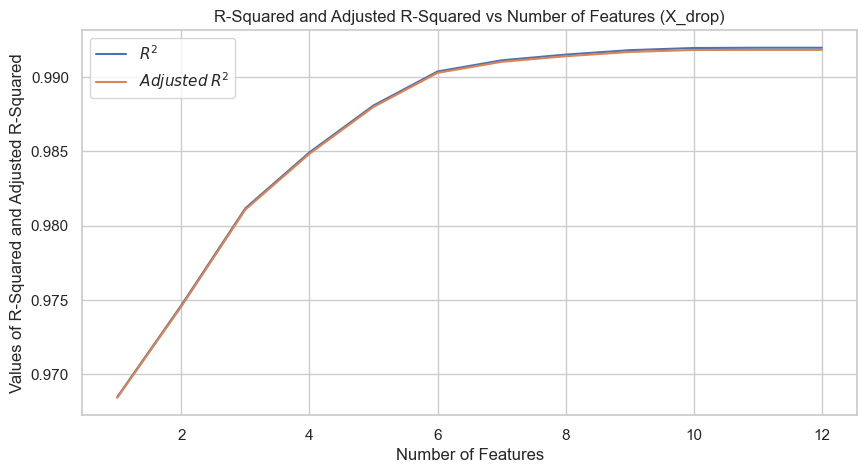

In [116]:
# Chart both R^2 and Adjusted R^2 for X_pred
# Define range for x-axis
_range_drop = range(1, len(r2_list_drop) + 1)

# Define chart size
plt.figure(figsize=(10, 5))

# Plot R^2 and Adjusted R^2
plt.plot(_range_drop, r2_list_drop, label='$R^2$')
plt.plot(_range_drop, adjusted_r2_list_drop, label='$Adjusted \: R^2$')

# Add labels and legend
plt.title('R-Squared and Adjusted R-Squared vs Number of Features (X_drop)')
plt.xlabel('Number of Features')
plt.ylabel('Values of R-Squared and Adjusted R-Squared')
plt.legend()

# Display the chart
plt.show()


In [117]:
# Added feature AverageRainingDays with R^2 = 0.986 and adjusted R^2 = 0.986

# (Step) Excluded = 
# **************************************************

# Resulting features:
# fruitset, RainingDays, seeds, fruitmass, clonesize, AverageRainingDays

In [211]:
# Forward Feature Selection on X_features
# Remember X_features = predictor_columns = ['AverageRainingDays','RainingDays', 'clonesize', 'fruitmass', 'seeds', 'fruitset']

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X_features.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.16f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.16f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.16f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))

# Resulting features:
# fruitset, RainingDays, seeds, fruitmass, clonesize, AverageRainingDays

# Added feature fruitset with R^2 = 0.968 and adjusted R^2 = 0.968
# Added feature RainingDays with R^2 = 0.975 and adjusted R^2 = 0.975
# Added feature seeds with R^2 = 0.976 and adjusted R^2 = 0.976
# Added feature fruitmass with R^2 = 0.986 and adjusted R^2 = 0.986
# Added feature clonesize with R^2 = 0.987 and adjusted R^2 = 0.986
# Added feature AverageRainingDays with R^2 = 0.987 and adjusted R^2 = 0.986
# **************************************************

# Resulting features:
# fruitset, RainingDays, seeds, fruitmass, clonesize, AverageRainingDays

Added feature fruitset with R^2 = 0.967 and adjusted R^2 = 0.9673811184997122
Added feature RainingDays with R^2 = 0.973 and adjusted R^2 = 0.9727229418310701
Added feature seeds with R^2 = 0.974 and adjusted R^2 = 0.9738084289121717
Added feature fruitmass with R^2 = 0.985 and adjusted R^2 = 0.9854008435323341
Added feature clonesize with R^2 = 0.986 and adjusted R^2 = 0.9855126143490188
**************************************************

Resulting features:
fruitset, RainingDays, seeds, fruitmass, clonesize


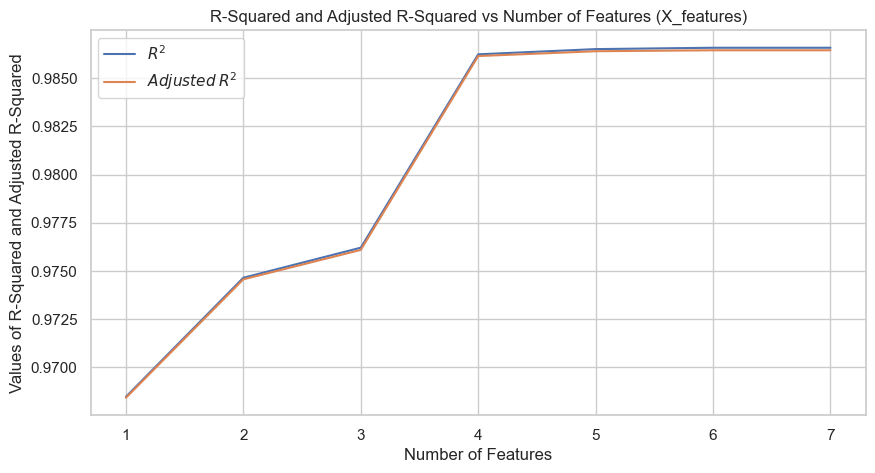

In [119]:
# Chart both R^2 and Adjusted R^2 for X_features
# Define range for x-axis
_range_features = range(1, len(r2_list) + 1)

# Define chart size
plt.figure(figsize=(10, 5))

# Plot R^2 and Adjusted R^2
plt.plot(_range_features, r2_list, label='$R^2$')
plt.plot(_range_features, adjusted_r2_list, label='$Adjusted \: R^2$')

# Add labels and legend
plt.title('R-Squared and Adjusted R-Squared vs Number of Features (X_features)')
plt.xlabel('Number of Features')
plt.ylabel('Values of R-Squared and Adjusted R-Squared')
plt.legend()

# Display the chart
plt.show()


In [210]:
# Take all columns except target as predictor columns
pred_columns = [c for c in df.columns if c != 'yield']
# Load the dataset as a pandas data frame
X = pd.DataFrame(df, columns = pred_columns)
y = df['yield']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

r2_list_pred = []
adjusted_r2_list_pred = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2_pred = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.16f' % 
                  (adjusted_r2_pred, best['a_r2']))

        # if model improves
        if adjusted_r2_pred > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2_pred}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.16f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list_pred.append(best['r2'])
    adjusted_r2_list_pred.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.16f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))

# Resulting features:
# fruitset, RainingDays, osmia, MinOfUpperTRange, seeds, fruitmass, andrena, honeybee, clonesize, AverageRainingDays, bumbles

# Not sure why R^2 score is 0.991 when this is effectively the same as X_drop

Added feature fruitset with R^2 = 0.967 and adjusted R^2 = 0.9673811184997122
Added feature RainingDays with R^2 = 0.973 and adjusted R^2 = 0.9727229418310701
Added feature osmia with R^2 = 0.980 and adjusted R^2 = 0.9794079968425342
Added feature MinOfUpperTRange with R^2 = 0.984 and adjusted R^2 = 0.9839161742574870
Added feature seeds with R^2 = 0.986 and adjusted R^2 = 0.9863257811109000
Added feature fruitmass with R^2 = 0.989 and adjusted R^2 = 0.9889128007764311
Added feature andrena with R^2 = 0.990 and adjusted R^2 = 0.9899282441673131
Added feature honeybee with R^2 = 0.991 and adjusted R^2 = 0.9905799027560594
Added feature clonesize with R^2 = 0.991 and adjusted R^2 = 0.9910743242870865
Added feature AverageRainingDays with R^2 = 0.991 and adjusted R^2 = 0.9912773819324081
Added feature bumbles with R^2 = 0.991 and adjusted R^2 = 0.9913432080209633
**************************************************

Resulting features:
fruitset, RainingDays, osmia, MinOfUpperTRange, seeds, 

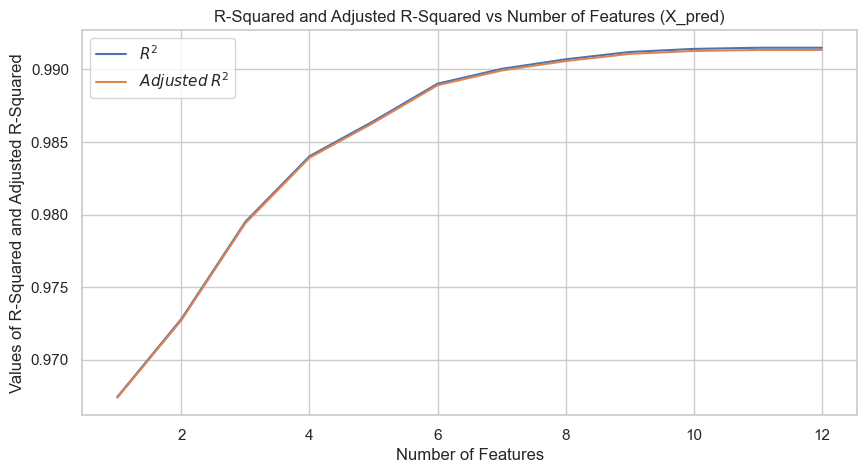

In [121]:
# Chart both R^2 and Adjusted R^2 for X_pred
# Define range for x-axis
_range_pred = range(1, len(r2_list_pred) + 1)

# Define chart size
plt.figure(figsize=(10, 5))

# Plot R^2 and Adjusted R^2
plt.plot(_range_pred, r2_list_pred, label='$R^2$')
plt.plot(_range_pred, adjusted_r2_list_pred, label='$Adjusted \: R^2$')

# Add labels and legend
plt.title('R-Squared and Adjusted R-Squared vs Number of Features (X_pred)')
plt.xlabel('Number of Features')
plt.ylabel('Values of R-Squared and Adjusted R-Squared')
plt.legend()

# Display the chart
plt.show()


# Save the plot as an image file
# plt.savefig('my_plot.png')

# Explanation from Microsoft Copilot:
# R², or the coefficient of determination, is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable or variables in a regression model12. It ranges from 0 to 1, where:

# A value of 0 indicates that the response variable cannot be explained by the predictor variables at all.
# A value of 1 indicates that the response variable can be perfectly explained by the predictor variables1.
# However, R² always increases when a new predictor variable is added to the regression model, even if the new predictor variable is almost completely unrelated to the response variable1. This is where Adjusted R² comes in.

In [199]:
# Run linear regression on the suggested 11 features:

feature_names = ['fruitset', 'RainingDays', 'osmia', 'AverageOfUpperTRange', 'seeds', 'fruitmass', 'andrena', 'honeybee', 'clonesize', 'AverageRainingDays', 'AverageOfLowerTRange']
X_suggested = df[feature_names]
y = df['yield']

X_suggested_train, X_suggested_test, y_suggested_train, y_suggested_test = train_test_split(X_suggested, y, test_size=0.2, random_state=42)


In [200]:
linreg_suggested = LinearRegression()

In [201]:
linreg_suggested.fit(X_suggested_train, y_suggested_train)

LinearRegression()

In [202]:
score_suggested = linreg_suggested.score(X_suggested_test, y_suggested_test)
score_suggested

# 0.9919023701350189 on 15/01/2024

0.9919023701350189

In [203]:
print(linreg_suggested.coef_, linreg_suggested.intercept_)

[ 7.29068084e+03  1.30809285e+00  5.11607394e+02 -2.79077934e+01
  2.99848513e+02 -1.73907758e+04  3.69569121e+02  7.11449468e+01
 -8.21975043e+00 -9.54674257e+02  2.37514924e+01] -14.791932826520679


In [204]:
X_suggested.columns

Index(['fruitset', 'RainingDays', 'osmia', 'AverageOfUpperTRange', 'seeds',
       'fruitmass', 'andrena', 'honeybee', 'clonesize', 'AverageRainingDays',
       'AverageOfLowerTRange'],
      dtype='object')

In [205]:
linreg_suggested.score(X_suggested, y)
# 0.9915442626547535 on 15/01/2024

0.9915442626547535

In [208]:
linreg_suggested_coef_df = pd.DataFrame({'feature': X_suggested.columns, 'coefficient': linreg_suggested.coef_})
linreg_suggested_coef_df

,feature,coefficient
0,fruitset,7290.680842
1,RainingDays,1.308093
2,osmia,511.607394
3,AverageOfUpperTRange,-27.907793
4,seeds,299.848513
5,fruitmass,-17390.775800
6,andrena,369.569121
7,honeybee,71.144947
8,clonesize,-8.219750
9,AverageRainingDays,-954.674257


In [209]:
predictions_linreg_suggested = linreg_suggested.predict(X_suggested_test)
predictions_linreg_suggested

array([4230.48699378, 6694.35693313, 6297.34797988, 6930.9702763 ,
       6890.78812293, 6699.45399922, 4912.45437777, 7597.42846328,
       3875.52051185, 6009.43021904, 4375.15164249, 6212.88661009,
       8527.85355635, 4410.35508725, 5354.76028957, 6148.95423113,
       3062.34105937, 4331.63227709, 5304.26551551, 6550.10756484,
       7030.25586748, 4987.65016156, 5717.74595355, 5800.69670415,
       3965.5263794 , 7061.93571776, 6821.06318226, 5391.95504497,
       3793.68556564, 6065.49719148, 6890.93666252, 5475.07762001,
       5404.6081304 , 5142.48107374, 6016.174     , 7579.52170878,
       4089.4600765 , 5892.16322888, 5475.43884274, 7690.1311991 ,
       6741.38193151, 5404.62139811, 5716.50441944, 6198.81569826,
       4419.93725424, 6226.60543845, 6925.63624959, 5770.14745822,
       6955.16243024, 7031.86850001, 3940.46921943, 7109.90154823,
       5518.63025652, 3794.40656256, 8135.50537216, 6060.22623914,
       8220.44903294, 5546.12329013, 2949.3223637 , 6800.93123

# 10.6 Base Line Accuarcy

In [122]:
# From Chat GPT and Microsoft Copilot
# Assuming you have defined df
# Assuming you have defined X_drop and y
# Split the data into training and testing sets
X_drop = df.drop('yield', axis=1)
y = df['yield']
X_drop_train, X_drop_test, y_drop_train, y_drop_test = train_test_split(X_drop, y, test_size=0.2, random_state=42)


# Calculate the mean of the target variable from the training set
mean_yield = np.mean(y_drop_train)

# Create a list with the same length as y_test filled with the mean_yield
preds = [mean_yield] * len(y_drop_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_drop_test, preds))
mae = mean_absolute_error(y_drop_test, preds)

print(f'Baseline RMSE: {rmse}')
print(f'Baseline MAE: {mae}')

# Baseline RMSE: 1405.7172043506266
# Baseline MAE: 1143.5493894718504

Baseline RMSE: 1405.7172043506266
Baseline MAE: 1143.5493894718504


In [123]:
# From Chat GPT
# Performing baseline accuracy on the entire dataset, where you use the mean of the target variable over the entire dataset as your baseline prediction, is a common practice. However, it's important to split your data into training and testing sets before calculating baseline accuracy. This ensures that the baseline is evaluated on a separate set of data that was not used during training.

# 11 Ridge Regression
Part of the regression family — it penalizes
features that have low predictive outcomes by
shrinking their coeOcients closer to zero. 
Can be used for classification or regression

The goal of "regularizing" regression models is to structurally prevent overfitting by imposing a penalty on the coefficients of the model.

Regularization methods like the Ridge and Lasso add this additional "penalty" on the size of coefficients to the loss function. When the loss function is minimized, this additional component is added to the residual sum of squares.

In other words, the minimization becomes a balance between the error between predictions and true values and the size of the coefficients. 

The two most common types of regularization are the **Lasso**, **Ridge**. 

### 11.1 Calculate Ridge Regression model

In [ ]:
# From IOD_Lab 4.4 

In [159]:
blue = pd.read_csv(Wild_Blueberry_csv)
# ignore this

In [160]:
# Check correlation
blue.corr()['yield'].sort_values()
# df.corr()['yield'].sort_values()

AverageRainingDays     -0.541215
RainingDays            -0.540069
clonesize              -0.516737
MaxOfLowerTRange       -0.187439
MaxOfUpperTRange       -0.187075
MinOfLowerTRange       -0.183339
AverageOfUpperTRange   -0.181774
AverageOfLowerTRange   -0.181293
MinOfUpperTRange       -0.175883
honeybee               -0.044250
Row#                   -0.024942
andrena                 0.140277
bumbles                 0.309407
osmia                   0.380892
fruitmass               0.930365
seeds                   0.961249
fruitset                0.984081
yield                   1.000000
Name: yield, dtype: float64

In [161]:
blueberry = blue.drop(['Row#', 'yield'], axis=1)
blueberry
# X_drop = df.drop('yield', axis=1)
# X_drop

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898
1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385
2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306
3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586
4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240
775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161


In [172]:
# X = blueberry
# predictor_columns = ['AverageRainingDays','RainingDays', 'clonesize', 'fruitmass', 'seeds', 'fruitset']
feature_names = ['fruitset', 'RainingDays', 'osmia', 'MinOfUpperTRange', 'seeds', 'fruitmass', 'andrena', 'honeybee', 'clonesize', 'AverageRainingDays', 'bumbles']
X = blueberry[feature_names]

# X = df.drop(['yield'], axis=1)
# X

In [173]:
# y = blue['yield']

y = df['yield']
y

Row#
0      3813.165795
1      4947.605663
2      3866.798965
3      4303.943030
4      3436.493543
          ...     
772    5333.873335
773    3373.436842
774    4203.027624
775    4166.299735
776    3943.131681
Name: yield, Length: 777, dtype: float64

In [174]:
# Create Model
model = LinearRegression()

In [175]:
# Fit
model.fit(X, y)

LinearRegression()

In [176]:
# Score
model.score(X, y)

# 0.9918072676562301 # result of X_drop so everything except yield
# 0.9915665576230842 this was result on fruitset', 'RainingDays', 'osmia', 'MinOfUpperTRange', 'seeds', 'fruitmass', 'andrena', 'honeybee', 'clonesize', 'AverageRainingDays', 'bumbles'
# 0.9917452710406399 on 15/01/2024

0.9915665576230842

In [177]:
# Check Coeffiricent
model.coef_

# array([-7.82200738e+00,  5.03423740e+01,  2.13272579e+02,  3.53816195e+02,
#        5.49590425e+02, -2.91080914e+13, -5.74769707e+13,  5.48394276e+12,
#       -3.36428687e+13,  2.30297173e+14,  5.48394276e+12, -1.46777523e+00,
#       -8.25251284e+02,  8.89031729e+03, -2.69257495e+04,  3.51758405e+02])

# array([ 7.94582265e+03, -1.87641801e+00,  5.35299833e+02, -1.46956578e+01,
#        2.81407527e+02, -1.67570681e+04,  3.43910124e+02,  6.62013260e+01,
#       -7.82120156e+00, -7.71092773e+02,  1.44538294e+02])

array([ 7.94582265e+03, -1.87641801e+00,  5.35299833e+02, -1.46956578e+01,
        2.81407527e+02, -1.67570681e+04,  3.43910124e+02,  6.62013260e+01,
       -7.82120156e+00, -7.71092773e+02,  1.44538294e+02])

In [178]:
X.columns

# Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
#       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
#       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
#       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
#      dtype='object')

# Index(['fruitset', 'RainingDays', 'osmia', 'MinOfUpperTRange', 'seeds',
#       'fruitmass', 'andrena', 'honeybee', 'clonesize', 'AverageRainingDays',
#       'bumbles'],
#      dtype='object')

Index(['fruitset', 'RainingDays', 'osmia', 'MinOfUpperTRange', 'seeds',
       'fruitmass', 'andrena', 'honeybee', 'clonesize', 'AverageRainingDays',
       'bumbles'],
      dtype='object')

In [179]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

In [180]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
ridgemodel = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    ridgemodel.set_params(alpha = a)
    ridgemodel.fit(X, y)
    coefs.append(ridgemodel.coef_)
    errors.append(mean_squared_error(ridgemodel.coef_, model.coef_))

### 11.2 Visual Representation of Coefficient of Ridge Model

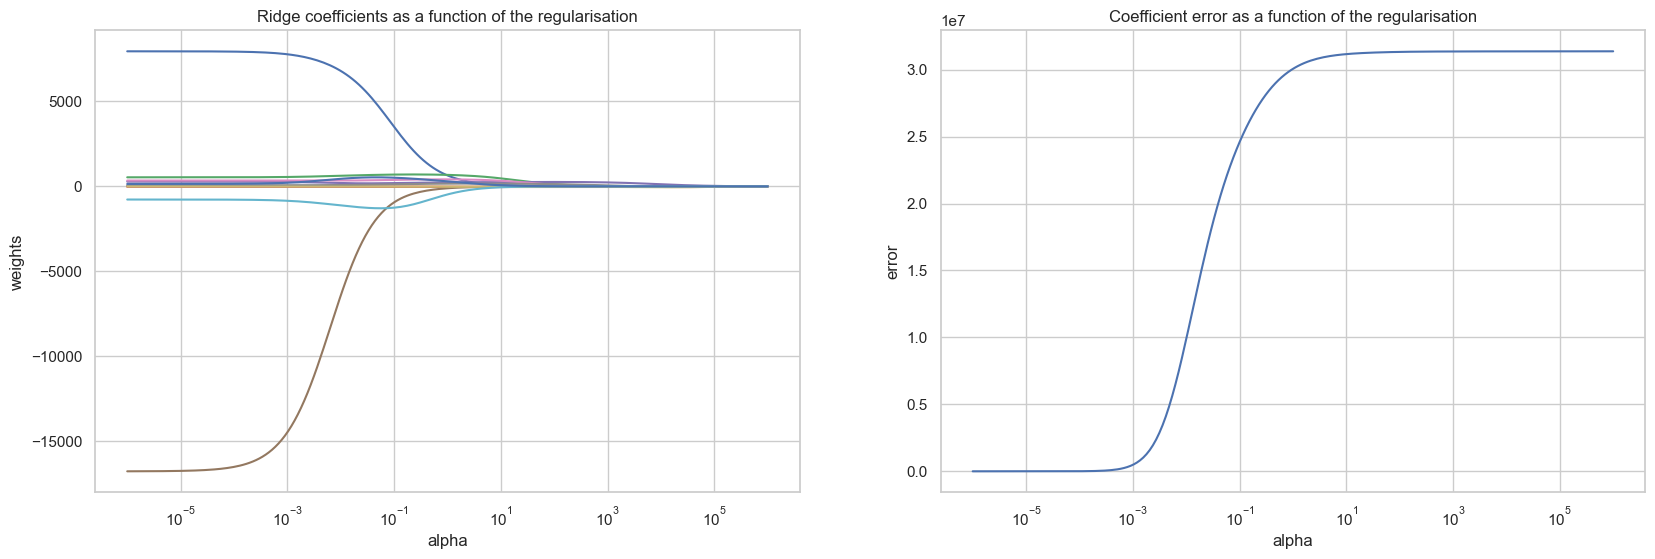

In [181]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [137]:
# Explantion from Microsoft Copilot

# Ridge Coefficients as a Function of the Regularisation (Left Plot): This plot shows how the coefficients of the Ridge regression model change as the regularization parameter (alpha) increases. Each line represents a different feature in the model. As alpha increases, the coefficients of the features decrease towards zero, which is a characteristic of Ridge regression. This plot helps in understanding the effect of increasing regularization on the model coefficients.

# Coefficient Error as a Function of the Regularisation (Right Plot): This plot shows how the error of the coefficients changes with increasing alpha. The error decreases initially with increasing alpha, reaches a minimum point, and then starts increasing. This suggests that there is an optimal alpha value that minimizes the error.

# These plots are useful for understanding the impact of the regularization parameter on the Ridge regression model and for choosing an optimal alpha value. 

### 11.3 Find an optimal value for Ridge regression alpha using `RidgeCV`.

[Go to the documentation and read how RidgeCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [182]:
%%time
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=100) # cv=10 means 10-fold cross-validation. I changed to 100
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

# Alpha: 13.049019780144016
# Score: 0.9850896683076197

# Alpha: 13.049019780144016
# Score: 0.9845541580569491

# With cv = 100
# Alpha: 1e-06
# Score: 0.9915665575909495

# From Microsoft Copilot
# It looks like you’ve successfully used RidgeCV to find the optimal alpha for your Ridge Regression model. 
# The optimal alpha value is approximately 13.049, and with this alpha, 
# your model has an R² score of approximately 0.985 on your training data.

# on 15/01/2024
# Alpha: 0.0020729217795953697
# Score: 0.9915345293913373

Alpha: 1e-06
Score: 0.9915665575909495
CPU times: total: 43.4 s
Wall time: 1min 14s


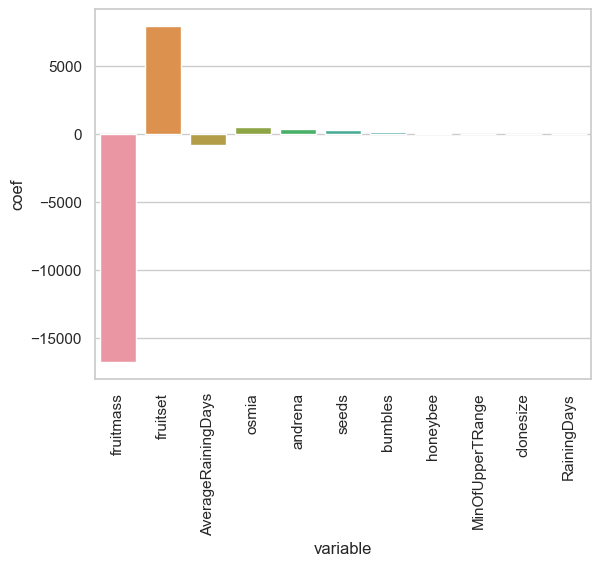

In [183]:
view_coeff(X, model)
plt.xticks(rotation='vertical');

In [140]:
# Explanation from Microsoft Copilot
# X-axis (Variable): This represents different variables or features used in the model. These include ‘fruitmass’, ‘fruitset’, ‘AverageRainin90Days’, ‘osmia’, ‘andrena’, ‘seeds’, ‘bumblebs’, ‘honeybee’, ‘MinOfUpperTRange’, ‘droneSize’, ‘RainingDays’.

# Y-axis (Coeff): This represents the coefficients of the variables in the model. A coefficient is a value that multiplies a variable to predict the output or response. The coefficient value signifies the mean change in the response given a one unit change in the predictor, while holding other predictors in the model constant.

# Bars: Each bar corresponds to a variable and its height represents the coefficient value. Positive values are above zero, negative below. For example, ‘fruitmass’ has a significantly negative coefficient, and ‘fruitset’ has a positive one.

# This graph helps you understand the influence of each variable on the model’s predictions. The larger the coefficient (positive or negative), the stronger the influence of that variable.

# 12 Lasso Regression
Part of the regression family — it penalizes
features that have low predictive outcomes by
shrinking their coeOcients closer to zero. Can
be used for classification or regression

### 12.1 Calculate Lasso Regression model

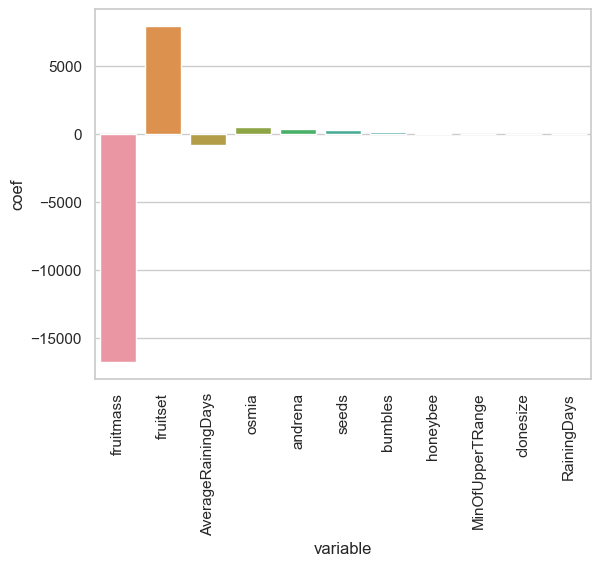

In [184]:
view_coeff(X, optimal_ridge)
plt.xticks(rotation='vertical');

### 12.2 Calculate Lasso Regression model

In [185]:
# create a model object to hold the modelling parameters
lassomodel = Lasso()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in lasso_alphas:
    lassomodel.set_params(alpha = a)
    lassomodel.fit(X, y)
    coefs.append(lassomodel.coef_)
    errors.append(mean_squared_error(lassomodel.coef_, model.coef_))

### 12.3 Visual Representation of Coefficient of Lasso Model

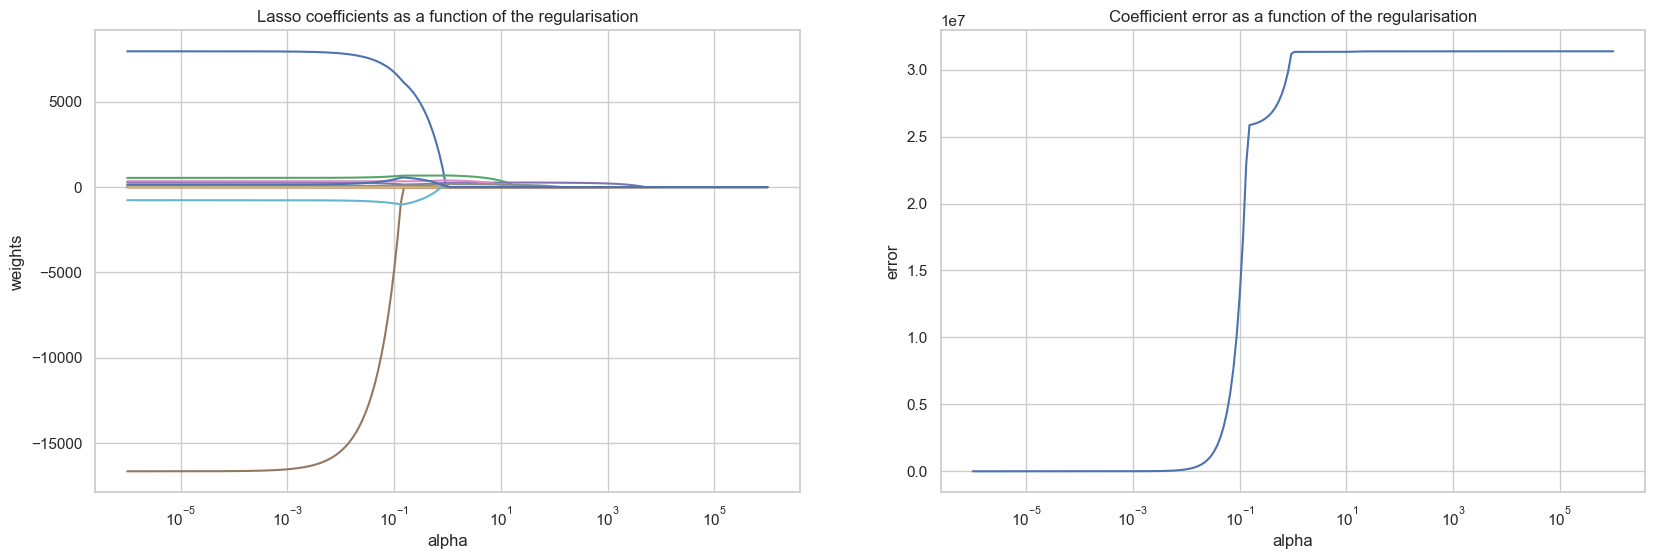

In [213]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [144]:
# Explantion from Microsoft Copilot
# Lasso Coefficients as a Function of the Regularisation (Left Plot): This plot shows how the coefficients of the Lasso regression model change as the regularization parameter (alpha) increases. Each line represents a different feature in the model. As alpha increases, the coefficients of the features decrease towards zero, which is a characteristic of Lasso regression. This plot helps in understanding the effect of increasing regularization on the model coefficients.

# Coefficient Error as a Function of the Regularisation (Right Plot): This plot shows how the error of the coefficients changes with increasing alpha. The error decreases initially with increasing alpha, reaches a minimum point, and then starts increasing. This suggests that there is an optimal alpha value that minimizes the error.

# These plots are useful for understanding the impact of the regularization parameter on the Lasso regression model and for choosing an optimal alpha value.

#### 12.4 Find an optimal value for Lasso regression alpha using `LassoCV`.

[Go to the documentation and read how LassoCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [187]:
%%time
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=100) # cv=10 means 10-fold cross-validation. I changed to 100
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

# Alpha: 2.4658110758226037
# Score: 0.9860072612157829

# Alpha: 2.4658110758226037
# Score: 0.9856097979629193

# With cv = 100
# Alpha: 1e-06
# Score: 0.9915665024302031

# From Microsoft Copilot
# It looks like you’ve successfully used LassoCV to find the optimal alpha for your Lasso Regression model. 
# The optimal alpha value is approximately 2.466, and with this alpha, 
# your model has an R² score of approximately 0.986 on your training data.

# on 15/01/2024
# Alpha: 0.0020729217795953697
# Score: 0.9916133300384973

Alpha: 1e-06
Score: 0.9915665024302031
CPU times: total: 5.03 s
Wall time: 7.28 s


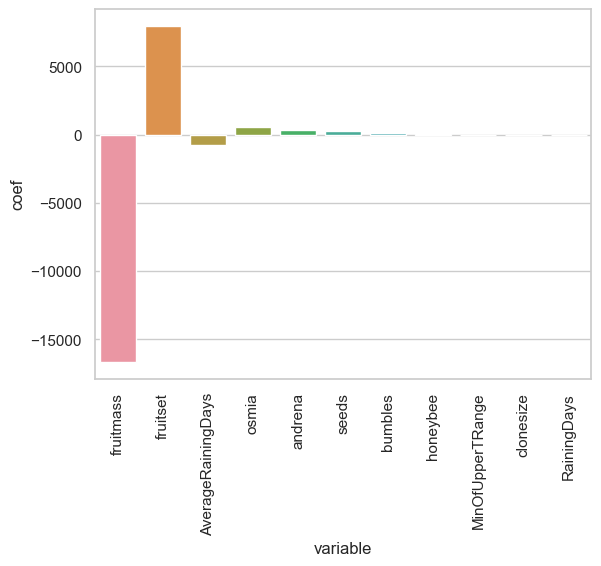

In [188]:
view_coeff(X, optimal_lasso)
plt.xticks(rotation='vertical');

## 13.Compare the residuals for the Ridge and Lasso visually.
Find and create sctterplot for both Ridge and Lasso residuals.

In [189]:
# Build the ridge and lasso using optimal alpha
ridge = Ridge(alpha=optimal_ridge.alpha_)
lasso = Lasso(alpha=optimal_lasso.alpha_)

# Need to fit the Lasso and Ridge outside of cross_val_score like we did with the ridge
ridge.fit(X, y)
lasso.fit(X, y)

Lasso(alpha=1e-06)

In [190]:
# model residuals:

ridge_resid = y - ridge.predict(X)
lasso_resid = y - lasso.predict(X)

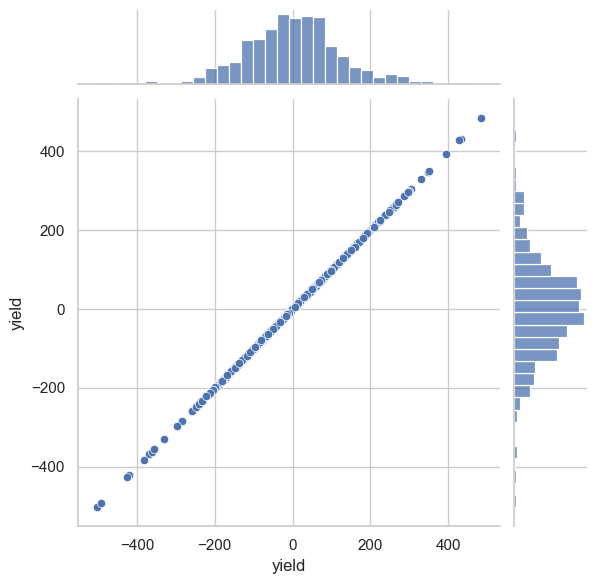

In [191]:
sns.jointplot(x=ridge_resid, y=lasso_resid);

In [150]:
# Explantion from Microsoft Copilot

# Scatter Plot: The main plot shows the relationship between ridge_resid and lasso_resid. Each point represents an observation in your dataset with its ridge_resid value on the x-axis and lasso_resid value on the y-axis. The points are densely populated along a diagonal line from the bottom left to the top right, indicating a strong positive correlation between ridge_resid and lasso_resid.

# Histograms: The plots on the top and right side of the scatter plot show the distribution of ridge_resid and lasso_resid values, respectively. These histograms provide an insight into the range and frequency of values for each variable.

# In summary, this jointplot provides a comprehensive view of the relationship between ridge_resid and lasso_resid, as well as their individual distributions. It suggests that ridge_resid and lasso_resid are positively correlated, meaning as one increases, so does the other.

# 14 Compare the Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²) scores:

- Multiple Linear Regression, 
- Ridge Regression, 
- Lasso Regression

In [196]:
# From Chat GPT and Microsoft Copilot

# Remember X = X_drop = df.drop('yield', axis=1)
# y = df['yield']

# Generate some sample data
# np.random.seed(42)
# X = np.random.rand(100, 5)  # 100 samples with 5 features
# y = 2*X[:, 0] + 3*X[:, 1] - 4*X[:, 2] + np.random.normal(0, 1, 100)  # Example linear relationship with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the mean of the target variable from the training set
mean_yield = np.mean(y_drop_train)

# Create a list with the same length as y_test filled with the mean_yield
preds = [mean_yield] * len(y_drop_test)

# Calculate RMSE and MAE for baseline
rmse_baseline = np.sqrt(mean_squared_error(y_drop_test, preds))
mae_baseline = mean_absolute_error(y_drop_test, preds)

print(f'Baseline MAE: {mae_baseline:.2f}')
print(f'Baseline RMSE: {rmse_baseline:.2f}\n')

# Standardize the features (important for Ridge and Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform Multiple Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Perform Ridge Regression
model_ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter for Ridge regularization
model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)

# Perform Lasso Regression
model_lasso = Lasso(alpha=1.0)  # You can adjust the alpha parameter for Lasso regularization
model_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = model_lasso.predict(X_test_scaled)

# Evaluate performance metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
#    print(f"Mean Absolute Error (MAE): {mae:.2f}")
#    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.16f}")
    print("\n")

# Compare performance metrics
evaluate_model(y_test, y_pred_lr, "Multiple Linear Regression for all 16 features")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression for all 16 features")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression for all 16 features")


Baseline MAE: 1143.55
Baseline RMSE: 1405.72

Multiple Linear Regression for all 16 features Metrics:
R-squared (R²): 0.9913733793291577


Ridge Regression for all 16 features Metrics:
R-squared (R²): 0.9906832500974772


Lasso Regression for all 16 features Metrics:
R-squared (R²): 0.9908032850488285




In [197]:
# From Chat GPT and Microsoft Copilot

# Assuming blueberry is the DataFrame containing your data
feature_names = ['fruitset', 'RainingDays', 'osmia', 'MinOfUpperTRange', 'seeds', 'fruitmass', 'andrena', 'honeybee', 'clonesize', 'AverageRainingDays', 'bumbles']
X1 = df[feature_names]
y1 = df['yield']

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standardize the features (important for Ridge and Lasso)
scaler1 = StandardScaler()
X_train_scaled1 = scaler1.fit_transform(X_train1)
X_test_scaled1 = scaler1.transform(X_test1)

# Linear Regression
lr_feature = LinearRegression()
lr_feature.fit(X1, y1)
y_pred_lr_feature = lr_feature.predict(X_test1)

# Perform Ridge Regression
model_ridge_feature = Ridge(alpha=1.0)  # You can adjust the alpha parameter for Ridge regularization
model_ridge_feature.fit(X_train_scaled1, y_train1)
y_pred_ridge_feature = model_ridge_feature.predict(X_test_scaled1)

# Perform Lasso Regression
model_lasso_feature = Lasso(alpha=1.0)  # You can adjust the alpha parameter for Lasso regularization
model_lasso_feature.fit(X_train_scaled1, y_train1)
y_pred_lasso_feature = model_lasso_feature.predict(X_test_scaled1)

# Evaluate performance metrics
def evaluate_model_feature(y_true1, y_pred1, model_name1):
    mae1 = mean_absolute_error(y_true1, y_pred1)
    rmse1 = np.sqrt(mean_squared_error(y_true1, y_pred1))
    r21 = r2_score(y_true1, y_pred1)
    print(f"{model_name1} Metrics:")
#    print(f"Mean Absolute Error (MAE): {mae1:.2f}")
#    print(f"Root Mean Squared Error (RMSE): {rmse1:.2f}")
    print(f"R-squared (R²): {r21:.16f}")
    print("\n")

# Compare performance metrics
evaluate_model_feature(y_test1, y_pred_lr_feature, "Multiple Linear Regression for 11 features ")
evaluate_model_feature(y_test1, y_pred_ridge_feature, "Ridge Regression for 11 features")
evaluate_model_feature(y_test1, y_pred_lasso_feature, "Lasso Regression for 11 features")

# Multiple Linear Regression Metrics:
# Mean Absolute Error (MAE): 0.78
# Root Mean Squared Error (RMSE): 0.99
# R-squared (R²): 0.56


# Ridge Regression Metrics:
# Mean Absolute Error (MAE): 0.78
# Root Mean Squared Error (RMSE): 0.99
# R-squared (R²): 0.56


# Lasso Regression Metrics:
# Mean Absolute Error (MAE): 1.27
# Root Mean Squared Error (RMSE): 1.53
# R-squared (R²): -0.04

# 0.9919023701350189 from re-running the linear regression on the eleven features 0.9915442626547535
# 0.9913432080209633 from Forward Feature Selection (Linear Regression)

Multiple Linear Regression for 11 features  Metrics:
R-squared (R²): 0.9919746420219046


Ridge Regression for 11 features Metrics:
R-squared (R²): 0.9906832500974772


Lasso Regression for 11 features Metrics:
R-squared (R²): 0.9908032850488285




In [153]:
# delete??
# From Chat GPT and Microsoft Copilot
# Assuming you have defined df
# Assuming you have defined X_drop and y
# Split the data into training and testing sets
X_drop = df.drop('yield', axis=1)
y = df['yield']
X_drop_train, X_drop_test, y_drop_train, y_drop_test = train_test_split(X_drop, y, test_size=0.2, random_state=42)

# Calculate the mean of the target variable from the training set
mean_yield = np.mean(y_drop_train)

# Create a list with the same length as y_test filled with the mean_yield
preds = [mean_yield] * len(y_drop_test)

# Calculate RMSE and MAE for baseline
rmse_baseline = np.sqrt(mean_squared_error(y_drop_test, preds))
mae_baseline = mean_absolute_error(y_drop_test, preds)

print(f'Baseline MAE: {mae_baseline:.2f}')
print(f'Baseline RMSE: {rmse_baseline:.2f}\n')


# Assuming blueberry is the DataFrame containing your data
feature_names = ['fruitset', 'RainingDays', 'osmia', 'MinOfUpperTRange', 'seeds', 'fruitmass', 'andrena', 'honeybee', 'clonesize', 'AverageRainingDays', 'bumbles']
X = df[feature_names]

# Linear Regression
linreg_drop = LinearRegression()
linreg_drop.fit(X_drop_train, y_drop_train)
y_pred_lr = linreg_drop.predict(X_drop_test)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_drop_train, y_drop_train)
y_pred_ridge = ridge_model.predict(X_drop_test)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_drop_train, y_drop_train)
y_pred_lasso = lasso_model.predict(X_drop_test)

# Compare performance metrics
evaluate_model(y_drop_test, y_pred_lr, "Multiple Linear Regression")
evaluate_model(y_drop_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_drop_test, y_pred_lasso, "Lasso Regression")


Baseline MAE: 1143.55
Baseline RMSE: 1405.72

Multiple Linear Regression Metrics:
Mean Absolute Error (MAE): 97.76
Root Mean Squared Error (RMSE): 129.72
R-squared (R²): 0.99


Ridge Regression Metrics:
Mean Absolute Error (MAE): 117.59
Root Mean Squared Error (RMSE): 163.35
R-squared (R²): 0.99


Lasso Regression Metrics:
Mean Absolute Error (MAE): 124.80
Root Mean Squared Error (RMSE): 170.45
R-squared (R²): 0.99




In [154]:
# delete??
# From Chat GPT and Microsoft Copilot
# Assuming you have defined df
# Assuming you have defined X_drop and y
# Split the data into training and testing sets
X_drop = df.drop('yield', axis=1)
y = df['yield']
X_drop_train, X_drop_test, y_drop_train, y_drop_test = train_test_split(X_drop, y, test_size=0.2, random_state=42)

# Calculate the mean of the target variable from the training set
mean_yield = np.mean(y_drop_train)

# Create a list with the same length as y_test filled with the mean_yield
preds = [mean_yield] * len(y_drop_test)

# Calculate RMSE and MAE for baseline
rmse_baseline = np.sqrt(mean_squared_error(y_drop_test, preds))
mae_baseline = mean_absolute_error(y_drop_test, preds)

print(f'Baseline MAE: {mae_baseline:.2f}')
print(f'Baseline RMSE: {rmse_baseline:.2f}\n')


# Assuming blueberry is the DataFrame containing your data
feature = df.drop('yield', axis=1).columns
X = df[feature]

# Linear Regression
linreg_drop = LinearRegression()
linreg_drop.fit(X, y)
y_pred_lr = linreg_drop.predict(X)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X, y)
y_pred_ridge = ridge_model.predict(X)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X, y)
y_pred_lasso = lasso_model.predict(X)

# Compare performance metrics
evaluate_model(y, y_pred_lr, "Multiple Linear Regression")
evaluate_model(y, y_pred_ridge, "Ridge Regression")
evaluate_model(y, y_pred_lasso, "Lasso Regression")

Baseline MAE: 1143.55
Baseline RMSE: 1405.72

Multiple Linear Regression Metrics:
Mean Absolute Error (MAE): 93.01
Root Mean Squared Error (RMSE): 123.21
R-squared (R²): 0.99


Ridge Regression Metrics:
Mean Absolute Error (MAE): 110.91
Root Mean Squared Error (RMSE): 150.18
R-squared (R²): 0.99


Lasso Regression Metrics:
Mean Absolute Error (MAE): 118.24
Root Mean Squared Error (RMSE): 159.37
R-squared (R²): 0.99




In [155]:
# Linear, Ridge, Lasso and do it with cross validation, Base line accuracy??

In [157]:
# References: 
# 1. Data in brief_WildBlueberryPollinationSimulation (word document)
# 2 https://www.kaggle.com/datasets/shashwatwork/wild-blueberry-yield-prediction-dataset
# 3. Linear Regression Scikit-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# 4. Ridge Regression Scikit-learn: https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification
# 5. Lasso Regression Scikit-learn: https://scikit-learn.org/stable/modules/linear_model.html#lasso
# 6. https://data.mendeley.com/datasets/p5hvjzsvn8/1

# 15 Code to compare the best models using klearn.metrics import make_scorer

In [ ]:
# %%time
# From Chat GPT

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# import numpy as np
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer
# from pycaret.regression import *

# Assuming you have already imported necessary libraries and defined X_drop, y, and split
#X_drop_train, X_drop_test, y_drop_train, y_drop_test = train_test_split(X_drop, y, test_size=0.2, random_state=42)

# Create a dictionary to store models
# models = {
#    'Linear Regression': LinearRegression(),
#    'Ridge Regression': Ridge(),
#    'Lasso Regression': Lasso(),
#    'SVR': SVR()
# }

# Create a dictionary to store model scores
# model_scores = {}

# Iterate through each model and fit it to the training data
# for name, model in models.items():
    # For SVR, it is recommended to scale the data
#    if name == 'SVR':
#        model_pipe = make_pipeline(StandardScaler(), model)
#    else:
#        model_pipe = model
    
#    model_pipe.fit(X_drop_train, y_drop_train)
    
    # Make predictions on the test set
#    y_pred = model_pipe.predict(X_drop_test)
    
    # Calculate the mean squared error as the performance metric
#    mse = mean_squared_error(y_drop_test, y_pred)
    
    # Store the model score
#    model_scores[name] = mse

# Print the model scores
# for name, score in model_scores.items():
#    print(f'{name}: Mean Squared Error = {score}')

# Choose the best model using PyCaret
# s = setup(data=df, target='yield', train_size=0.8, session_id=42)
# best_model = compare_models()

# If you want to use the best model obtained from PyCaret for further analysis
# You can access it using the 'best_model' variable

# Example of predicting with the best model
# y_pred_pycaret = predict_model(best_model, data=X_drop_test)

# You can evaluate the predictions as needed
# mse_pycaret = mean_squared_error(y_drop_test, y_pred_pycaret['prediction_label'])
# print(f'Best Model (PyCaret): Mean Squared Error = {mse_pycaret}')

In [ ]:
# pip install --user scikit-learn pandas pycaret

"""
Requirement already satisfied: scikit-learn in c:\users\nick_\anaconda3\lib\site-packages (1.3.0)
Requirement already satisfied: pandas in c:\users\nick_\anaconda3\lib\site-packages (1.5.3)
Collecting pycaret
  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/eb/43/ec8d59a663e0a1a67196b404ec38ccb0051708bad74a48c80d96c61dd0e5/pycaret-3.2.0-py3-none-any.whl.metadata
  Using cached pycaret-3.2.0-py3-none-any.whl.metadata (17 kB)
Requirement already satisfied: numpy>=1.17.3 in c:\users\nick_\anaconda3\lib\site-packages (from scikit-learn) (1.24.3)
Requirement already satisfied: scipy>=1.5.0 in c:\users\nick_\anaconda3\lib\site-packages (from scikit-learn) (1.10.1)
Requirement already satisfied: joblib>=1.1.1 in c:\users\nick_\anaconda3\lib\site-packages (from scikit-learn) (1.2.0)
Requirement already satisfied: threadpoolctl>=2.0.0 in c:\users\nick_\anaconda3\lib\site-packages (from scikit-learn) (2.2.0)
Requirement already satisfied: python-dateutil>=2.8.1 in c:\users\nick_\anaconda3\lib\site-packages (from pandas) (2.8.2)
Requirement already satisfied: pytz>=2020.1 in c:\users\nick_\anaconda3\lib\site-packages (from pandas) (2023.3.post1)
Collecting category-encoders>=2.4.0 (from pycaret)
  Obtaining dependency information for category-encoders>=2.4.0 from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
Requirement already satisfied: cloudpickle in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (2.2.1)
Collecting deprecation>=2.1.0 (from pycaret)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
Requirement already satisfied: imbalanced-learn>=0.8.1 in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (0.10.1)
Requirement already satisfied: importlib-metadata>=4.12.0 in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (6.0.0)
Requirement already satisfied: ipython>=5.5.0 in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (8.15.0)
Requirement already satisfied: ipywidgets>=7.6.5 in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (8.0.4)
Requirement already satisfied: jinja2>=1.2 in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (3.1.2)
Requirement already satisfied: kaleido>=0.2.1 in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (0.2.1)
Collecting lightgbm>=3.0.0 (from pycaret)
  Obtaining dependency information for lightgbm>=3.0.0 from https://files.pythonhosted.org/packages/74/02/5ad29a2a3d193a87d5a05fb7fd3b4e30b8eb6db7a9ddbe193beb7053978f/lightgbm-4.2.0-py3-none-win_amd64.whl.metadata
  Using cached lightgbm-4.2.0-py3-none-win_amd64.whl.metadata (19 kB)
Requirement already satisfied: markupsafe>=2.0.1 in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (2.1.1)
Collecting matplotlib<=3.6,>=3.3.0 (from pycaret)
  Using cached matplotlib-3.6.0-cp311-cp311-win_amd64.whl (7.2 MB)
Requirement already satisfied: nbformat>=4.2.0 in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (5.9.2)
Requirement already satisfied: numba>=0.55.0 in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (0.57.1)
Collecting plotly-resampler>=0.8.3.1 (from pycaret)
  Obtaining dependency information for plotly-resampler>=0.8.3.1 from https://files.pythonhosted.org/packages/c7/17/a4874896ad254a05259f8e8ae5130b0ec5cd2737fcc5b620dbc41a92dfac/plotly_resampler-0.9.2-py3-none-any.whl.metadata
  Using cached plotly_resampler-0.9.2-py3-none-any.whl.metadata (13 kB)
Requirement already satisfied: plotly>=5.0.0 in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (5.9.0)
Collecting pmdarima!=1.8.1,<3.0.0,>=1.8.0 (from pycaret)
  Obtaining dependency information for pmdarima!=1.8.1,<3.0.0,>=1.8.0 from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata (8.0 kB)
Requirement already satisfied: psutil>=5.9.0 in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (5.9.0)
Collecting pyod>=1.0.8 (from pycaret)
  Using cached pyod-1.1.2-py3-none-any.whl
Requirement already satisfied: requests>=2.27.1 in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (2.31.0)
Collecting schemdraw==0.15 (from pycaret)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
Collecting scikit-learn
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
Collecting scikit-plot>=0.3.7 (from pycaret)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
Collecting sktime!=0.17.1,!=0.17.2,!=0.18.0,<0.22.0,>=0.16.1 (from pycaret)
  Obtaining dependency information for sktime!=0.17.1,!=0.17.2,!=0.18.0,<0.22.0,>=0.16.1 from https://files.pythonhosted.org/packages/0f/70/a791db68c6f6922eb9e79baf1466263147a487c5b7ba7813f5868901e032/sktime-0.21.1-py3-none-any.whl.metadata
  Using cached sktime-0.21.1-py3-none-any.whl.metadata (25 kB)
Requirement already satisfied: statsmodels>=0.12.1 in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (0.14.0)
Collecting tbats>=1.1.3 (from pycaret)
  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
Requirement already satisfied: tqdm>=4.62.0 in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (4.65.0)
Requirement already satisfied: xxhash in c:\users\nick_\anaconda3\lib\site-packages (from pycaret) (2.0.2)
Collecting yellowbrick>=1.4 (from pycaret)
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
Requirement already satisfied: patsy>=0.5.1 in c:\users\nick_\anaconda3\lib\site-packages (from category-encoders>=2.4.0->pycaret) (0.5.3)
Requirement already satisfied: packaging in c:\users\nick_\anaconda3\lib\site-packages (from deprecation>=2.1.0->pycaret) (23.1)
Requirement already satisfied: zipp>=0.5 in c:\users\nick_\anaconda3\lib\site-packages (from importlib-metadata>=4.12.0->pycaret) (3.11.0)
Requirement already satisfied: backcall in c:\users\nick_\anaconda3\lib\site-packages (from ipython>=5.5.0->pycaret) (0.2.0)
Requirement already satisfied: decorator in c:\users\nick_\anaconda3\lib\site-packages (from ipython>=5.5.0->pycaret) (5.1.1)
Requirement already satisfied: jedi>=0.16 in c:\users\nick_\anaconda3\lib\site-packages (from ipython>=5.5.0->pycaret) (0.18.1)
Requirement already satisfied: matplotlib-inline in c:\users\nick_\anaconda3\lib\site-packages (from ipython>=5.5.0->pycaret) (0.1.6)
Requirement already satisfied: pickleshare in c:\users\nick_\anaconda3\lib\site-packages (from ipython>=5.5.0->pycaret) (0.7.5)
Requirement already satisfied: prompt-toolkit!=3.0.37,<3.1.0,>=3.0.30 in c:\users\nick_\anaconda3\lib\site-packages (from ipython>=5.5.0->pycaret) (3.0.36)
Requirement already satisfied: pygments>=2.4.0 in c:\users\nick_\anaconda3\lib\site-packages (from ipython>=5.5.0->pycaret) (2.15.1)
Requirement already satisfied: stack-data in c:\users\nick_\anaconda3\lib\site-packages (from ipython>=5.5.0->pycaret) (0.2.0)
Requirement already satisfied: traitlets>=5 in c:\users\nick_\anaconda3\lib\site-packages (from ipython>=5.5.0->pycaret) (5.7.1)
Requirement already satisfied: colorama in c:\users\nick_\anaconda3\lib\site-packages (from ipython>=5.5.0->pycaret) (0.4.6)
Requirement already satisfied: ipykernel>=4.5.1 in c:\users\nick_\anaconda3\lib\site-packages (from ipywidgets>=7.6.5->pycaret) (6.25.0)
Requirement already satisfied: widgetsnbextension~=4.0 in c:\users\nick_\anaconda3\lib\site-packages (from ipywidgets>=7.6.5->pycaret) (4.0.5)
Requirement already satisfied: jupyterlab-widgets~=3.0 in c:\users\nick_\anaconda3\lib\site-packages (from ipywidgets>=7.6.5->pycaret) (3.0.5)
Requirement already satisfied: contourpy>=1.0.1 in c:\users\nick_\anaconda3\lib\site-packages (from matplotlib<=3.6,>=3.3.0->pycaret) (1.0.5)
Requirement already satisfied: cycler>=0.10 in c:\users\nick_\anaconda3\lib\site-packages (from matplotlib<=3.6,>=3.3.0->pycaret) (0.11.0)
Requirement already satisfied: fonttools>=4.22.0 in c:\users\nick_\anaconda3\lib\site-packages (from matplotlib<=3.6,>=3.3.0->pycaret) (4.25.0)
Requirement already satisfied: kiwisolver>=1.0.1 in c:\users\nick_\anaconda3\lib\site-packages (from matplotlib<=3.6,>=3.3.0->pycaret) (1.4.4)
Requirement already satisfied: pillow>=6.2.0 in c:\users\nick_\anaconda3\lib\site-packages (from matplotlib<=3.6,>=3.3.0->pycaret) (9.4.0)
Requirement already satisfied: pyparsing>=2.2.1 in c:\users\nick_\anaconda3\lib\site-packages (from matplotlib<=3.6,>=3.3.0->pycaret) (3.0.9)
Requirement already satisfied: fastjsonschema in c:\users\nick_\anaconda3\lib\site-packages (from nbformat>=4.2.0->pycaret) (2.16.2)
Requirement already satisfied: jsonschema>=2.6 in c:\users\nick_\anaconda3\lib\site-packages (from nbformat>=4.2.0->pycaret) (4.17.3)
Requirement already satisfied: jupyter-core in c:\users\nick_\anaconda3\lib\site-packages (from nbformat>=4.2.0->pycaret) (5.3.0)
Requirement already satisfied: llvmlite<0.41,>=0.40.0dev0 in c:\users\nick_\anaconda3\lib\site-packages (from numba>=0.55.0->pycaret) (0.40.0)
Requirement already satisfied: tenacity>=6.2.0 in c:\users\nick_\anaconda3\lib\site-packages (from plotly>=5.0.0->pycaret) (8.2.2)
Collecting dash>=2.9.0 (from plotly-resampler>=0.8.3.1->pycaret)
  Obtaining dependency information for dash>=2.9.0 from https://files.pythonhosted.org/packages/7b/62/438626ab498869249e99376684ba6d88931e7c2dd86d03a92d9d7a9b4c54/dash-2.14.2-py3-none-any.whl.metadata
  Using cached dash-2.14.2-py3-none-any.whl.metadata (11 kB)
Collecting orjson<4.0.0,>=3.8.0 (from plotly-resampler>=0.8.3.1->pycaret)
  Obtaining dependency information for orjson<4.0.0,>=3.8.0 from https://files.pythonhosted.org/packages/5d/67/d7837cf0ac956e3c81c67dda3e8f2ffc60dd50ffc480ec7c17f2e22a36ae/orjson-3.9.10-cp311-none-win_amd64.whl.metadata
  Using cached orjson-3.9.10-cp311-none-win_amd64.whl.metadata (50 kB)
Requirement already satisfied: tsdownsample==0.1.2 in c:\users\nick_\anaconda3\lib\site-packages (from plotly-resampler>=0.8.3.1->pycaret) (0.1.2)
Collecting Cython!=0.29.18,!=0.29.31,>=0.29 (from pmdarima!=1.8.1,<3.0.0,>=1.8.0->pycaret)
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/85/7d/58635941dfbb5b4e197adb88080b9cbfb230dc3b75683698a530a1989bdb/Cython-3.0.8-cp311-cp311-win_amd64.whl.metadata
  Using cached Cython-3.0.8-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
Requirement already satisfied: urllib3 in c:\users\nick_\anaconda3\lib\site-packages (from pmdarima!=1.8.1,<3.0.0,>=1.8.0->pycaret) (1.26.16)
Requirement already satisfied: setuptools!=50.0.0,>=38.6.0 in c:\users\nick_\anaconda3\lib\site-packages (from pmdarima!=1.8.1,<3.0.0,>=1.8.0->pycaret) (68.0.0)
Requirement already satisfied: six in c:\users\nick_\anaconda3\lib\site-packages (from pyod>=1.0.8->pycaret) (1.16.0)
Requirement already satisfied: charset-normalizer<4,>=2 in c:\users\nick_\anaconda3\lib\site-packages (from requests>=2.27.1->pycaret) (2.0.4)
Requirement already satisfied: idna<4,>=2.5 in c:\users\nick_\anaconda3\lib\site-packages (from requests>=2.27.1->pycaret) (3.4)
Requirement already satisfied: certifi>=2017.4.17 in c:\users\nick_\anaconda3\lib\site-packages (from requests>=2.27.1->pycaret) (2023.7.22)
Collecting deprecated>=1.2.13 (from sktime!=0.17.1,!=0.17.2,!=0.18.0,<0.22.0,>=0.16.1->pycaret)
  Obtaining dependency information for deprecated>=1.2.13 from https://files.pythonhosted.org/packages/20/8d/778b7d51b981a96554f29136cd59ca7880bf58094338085bcf2a979a0e6a/Deprecated-1.2.14-py2.py3-none-any.whl.metadata
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl.metadata (5.4 kB)
Collecting scikit-base<0.6.0 (from sktime!=0.17.1,!=0.17.2,!=0.18.0,<0.22.0,>=0.16.1->pycaret)
  Obtaining dependency information for scikit-base<0.6.0 from https://files.pythonhosted.org/packages/e1/05/c42d5834896d0c112e76bb5b1ff0532e06cda405ae3154be5593a4aa8f37/scikit_base-0.5.2-py3-none-any.whl.metadata
  Using cached scikit_base-0.5.2-py3-none-any.whl.metadata (8.6 kB)
Requirement already satisfied: Flask<3.1,>=1.0.4 in c:\users\nick_\anaconda3\lib\site-packages (from dash>=2.9.0->plotly-resampler>=0.8.3.1->pycaret) (2.2.2)
Requirement already satisfied: Werkzeug<3.1 in c:\users\nick_\anaconda3\lib\site-packages (from dash>=2.9.0->plotly-resampler>=0.8.3.1->pycaret) (2.2.3)
Requirement already satisfied: dash-html-components==2.0.0 in c:\users\nick_\anaconda3\lib\site-packages (from dash>=2.9.0->plotly-resampler>=0.8.3.1->pycaret) (2.0.0)
Requirement already satisfied: dash-core-components==2.0.0 in c:\users\nick_\anaconda3\lib\site-packages (from dash>=2.9.0->plotly-resampler>=0.8.3.1->pycaret) (2.0.0)
Requirement already satisfied: dash-table==5.0.0 in c:\users\nick_\anaconda3\lib\site-packages (from dash>=2.9.0->plotly-resampler>=0.8.3.1->pycaret) (5.0.0)
Requirement already satisfied: typing-extensions>=4.1.1 in c:\users\nick_\anaconda3\lib\site-packages (from dash>=2.9.0->plotly-resampler>=0.8.3.1->pycaret) (4.7.1)
Collecting retrying (from dash>=2.9.0->plotly-resampler>=0.8.3.1->pycaret)
  Using cached retrying-1.3.4-py3-none-any.whl (11 kB)
Collecting ansi2html (from dash>=2.9.0->plotly-resampler>=0.8.3.1->pycaret)
  Obtaining dependency information for ansi2html from https://files.pythonhosted.org/packages/42/d7/1bc3433a2406b891182c25a7926abe3eb19af5870d540375ebf7795885b3/ansi2html-1.9.1-py3-none-any.whl.metadata
  Using cached ansi2html-1.9.1-py3-none-any.whl.metadata (3.7 kB)
Requirement already satisfied: nest-asyncio in c:\users\nick_\anaconda3\lib\site-packages (from dash>=2.9.0->plotly-resampler>=0.8.3.1->pycaret) (1.5.6)
Requirement already satisfied: wrapt<2,>=1.10 in c:\users\nick_\anaconda3\lib\site-packages (from deprecated>=1.2.13->sktime!=0.17.1,!=0.17.2,!=0.18.0,<0.22.0,>=0.16.1->pycaret) (1.14.1)
Requirement already satisfied: comm>=0.1.1 in c:\users\nick_\anaconda3\lib\site-packages (from ipykernel>=4.5.1->ipywidgets>=7.6.5->pycaret) (0.1.2)
Requirement already satisfied: debugpy>=1.6.5 in c:\users\nick_\anaconda3\lib\site-packages (from ipykernel>=4.5.1->ipywidgets>=7.6.5->pycaret) (1.6.7)
Requirement already satisfied: jupyter-client>=6.1.12 in c:\users\nick_\anaconda3\lib\site-packages (from ipykernel>=4.5.1->ipywidgets>=7.6.5->pycaret) (7.4.9)
Requirement already satisfied: pyzmq>=20 in c:\users\nick_\anaconda3\lib\site-packages (from ipykernel>=4.5.1->ipywidgets>=7.6.5->pycaret) (23.2.0)
Requirement already satisfied: tornado>=6.1 in c:\users\nick_\anaconda3\lib\site-packages (from ipykernel>=4.5.1->ipywidgets>=7.6.5->pycaret) (6.3.2)
Requirement already satisfied: parso<0.9.0,>=0.8.0 in c:\users\nick_\anaconda3\lib\site-packages (from jedi>=0.16->ipython>=5.5.0->pycaret) (0.8.3)
Requirement already satisfied: attrs>=17.4.0 in c:\users\nick_\anaconda3\lib\site-packages (from jsonschema>=2.6->nbformat>=4.2.0->pycaret) (22.1.0)
Requirement already satisfied: pyrsistent!=0.17.0,!=0.17.1,!=0.17.2,>=0.14.0 in c:\users\nick_\anaconda3\lib\site-packages (from jsonschema>=2.6->nbformat>=4.2.0->pycaret) (0.18.0)
Requirement already satisfied: platformdirs>=2.5 in c:\users\nick_\anaconda3\lib\site-packages (from jupyter-core->nbformat>=4.2.0->pycaret) (3.10.0)
Requirement already satisfied: pywin32>=300 in c:\users\nick_\anaconda3\lib\site-packages (from jupyter-core->nbformat>=4.2.0->pycaret) (305.1)
Requirement already satisfied: wcwidth in c:\users\nick_\anaconda3\lib\site-packages (from prompt-toolkit!=3.0.37,<3.1.0,>=3.0.30->ipython>=5.5.0->pycaret) (0.2.5)
Requirement already satisfied: executing in c:\users\nick_\anaconda3\lib\site-packages (from stack-data->ipython>=5.5.0->pycaret) (0.8.3)
Requirement already satisfied: asttokens in c:\users\nick_\anaconda3\lib\site-packages (from stack-data->ipython>=5.5.0->pycaret) (2.0.5)
Requirement already satisfied: pure-eval in c:\users\nick_\anaconda3\lib\site-packages (from stack-data->ipython>=5.5.0->pycaret) (0.2.2)
Requirement already satisfied: itsdangerous>=2.0 in c:\users\nick_\anaconda3\lib\site-packages (from Flask<3.1,>=1.0.4->dash>=2.9.0->plotly-resampler>=0.8.3.1->pycaret) (2.0.1)
Requirement already satisfied: click>=8.0 in c:\users\nick_\anaconda3\lib\site-packages (from Flask<3.1,>=1.0.4->dash>=2.9.0->plotly-resampler>=0.8.3.1->pycaret) (8.0.4)
Requirement already satisfied: entrypoints in c:\users\nick_\anaconda3\lib\site-packages (from jupyter-client>=6.1.12->ipykernel>=4.5.1->ipywidgets>=7.6.5->pycaret) (0.4)
Using cached pycaret-3.2.0-py3-none-any.whl (484 kB)
Using cached category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)
Using cached lightgbm-4.2.0-py3-none-win_amd64.whl (1.3 MB)
Using cached plotly_resampler-0.9.2-py3-none-any.whl (81 kB)
Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl (614 kB)
Using cached sktime-0.21.1-py3-none-any.whl (17.1 MB)
Using cached Cython-3.0.8-cp311-cp311-win_amd64.whl (2.8 MB)
Using cached dash-2.14.2-py3-none-any.whl (10.2 MB)
Using cached Deprecated-1.2.14-py2.py3-none-any.whl (9.6 kB)
Using cached orjson-3.9.10-cp311-none-win_amd64.whl (135 kB)
Using cached scikit_base-0.5.2-py3-none-any.whl (118 kB)
Using cached ansi2html-1.9.1-py3-none-any.whl (17 kB)
Installing collected packages: scikit-base, schemdraw, retrying, orjson, deprecation, deprecated, Cython, ansi2html, scikit-learn, matplotlib, lightgbm, yellowbrick, sktime, scikit-plot, pyod, dash, pmdarima, plotly-resampler, category-encoders, tbats, pycaret
Successfully installed Cython-3.0.8 ansi2html-1.9.1 category-encoders-2.6.3 dash-2.14.2 deprecated-1.2.14 deprecation-2.1.0 lightgbm-4.2.0 matplotlib-3.6.0 orjson-3.9.10 plotly-resampler-0.9.2 pmdarima-2.0.4 pycaret-3.2.0 pyod-1.1.2 retrying-1.3.4 schemdraw-0.15 scikit-base-0.5.2 scikit-learn-1.2.2 scikit-plot-0.3.7 sktime-0.21.1 tbats-1.1.3 yellowbrick-1.5
Note: you may need to restart the kernel to use updated packages. """

In [ ]:
# WARNING: The scripts cygdb.exe, cython.exe and cythonize.exe are installed in 'C:\Users\nick_\AppData\Roaming\Python\Python311\Scripts' which is not on PATH.
#  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
#  WARNING: The script ansi2html.exe is installed in 'C:\Users\nick_\AppData\Roaming\Python\Python311\Scripts' which is not on PATH.
#  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
#  WARNING: The scripts dash-generate-components.exe, dash-update-components.exe and renderer.exe are installed in 'C:\Users\nick_\AppData\Roaming\Python\Python311\Scripts' which is not on PATH.
#  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
# ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
# tables 3.8.0 requires blosc2~=2.0.0, which is not installed.